In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

import icewave.field.time as timest


In [4]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw
import icewave.phone.analyse as analyse


#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.field.multi_instruments as multi

import phonefleet.connect as connect
import phonefleet.data as dataphone

Linux
oural
Please install garmin package
Linux

/media/turbots/


In [5]:

base = f'/media/turbots/BlueDisk/Shack25_local/'

date = '0206'

folder = base +f'Data/{date}/Phone/*/'
savefolder = base + f'Data/{date}/Phone/Results/'

filelist = glob.glob(folder+'*accelerometer-*')

print(f"Number of files : {len(filelist)}")

Number of files : 231


In [6]:

base = f'/media/turbots/BlueDisk/Shack25_local/'

date = '0206'

folder = base +f'Data/{date}/Phone/*/'
savefolder = base + f'Data/{date}/Phone/Results/'

if not os.path.exists(savefolder):
    os.makedirs(savefolder)
    
imin = 16
imax = 24
filelist1 = glob.glob(folder+'accelerometer-*')
filelist2 = glob.glob(folder+'*accelerometer-*')
filelist = filelist1+filelist2
selectfiles = []

phonelist=[]
for filename in filelist:
    phone = int(filename.split('/')[-2])
    if not phone in phonelist:
        phonelist.append(phone)
    parse = filename.split('.') 
    if len(parse)>2:
        name = parse[2]
    else:
        name = parse[0]
    num = int(name.split('-')[1])
    #print(num)

    if True:# and ((num>=imin and num<=imax) or num==1):
        selectfiles.append(filename)
print(f"Number of files : {len(selectfiles)}")
print(phonelist)

Number of files : 231
[1, 2, 3]


In [7]:
phonelist = []
datas = {}
for filename in selectfiles:
    phone = int(filename.split('/')[-2])
    if not phone in phonelist:
        phonelist.append(phone)
        datas[phone]={}
        datas[phone]['filelist']=[]
    datas[phone]['filelist'].append(filename)

for phone in datas.keys():
    print(f"Phone {phone} Number of files : {len(datas[phone]['filelist'])}")

    

Phone 1 Number of files : 78
Phone 2 Number of files : 74
Phone 3 Number of files : 79


In [7]:
filename = selectfiles[25]
data = rw.read_csv(filename,delimiter=',')
dic = dataphone.read_raw(data,'a')

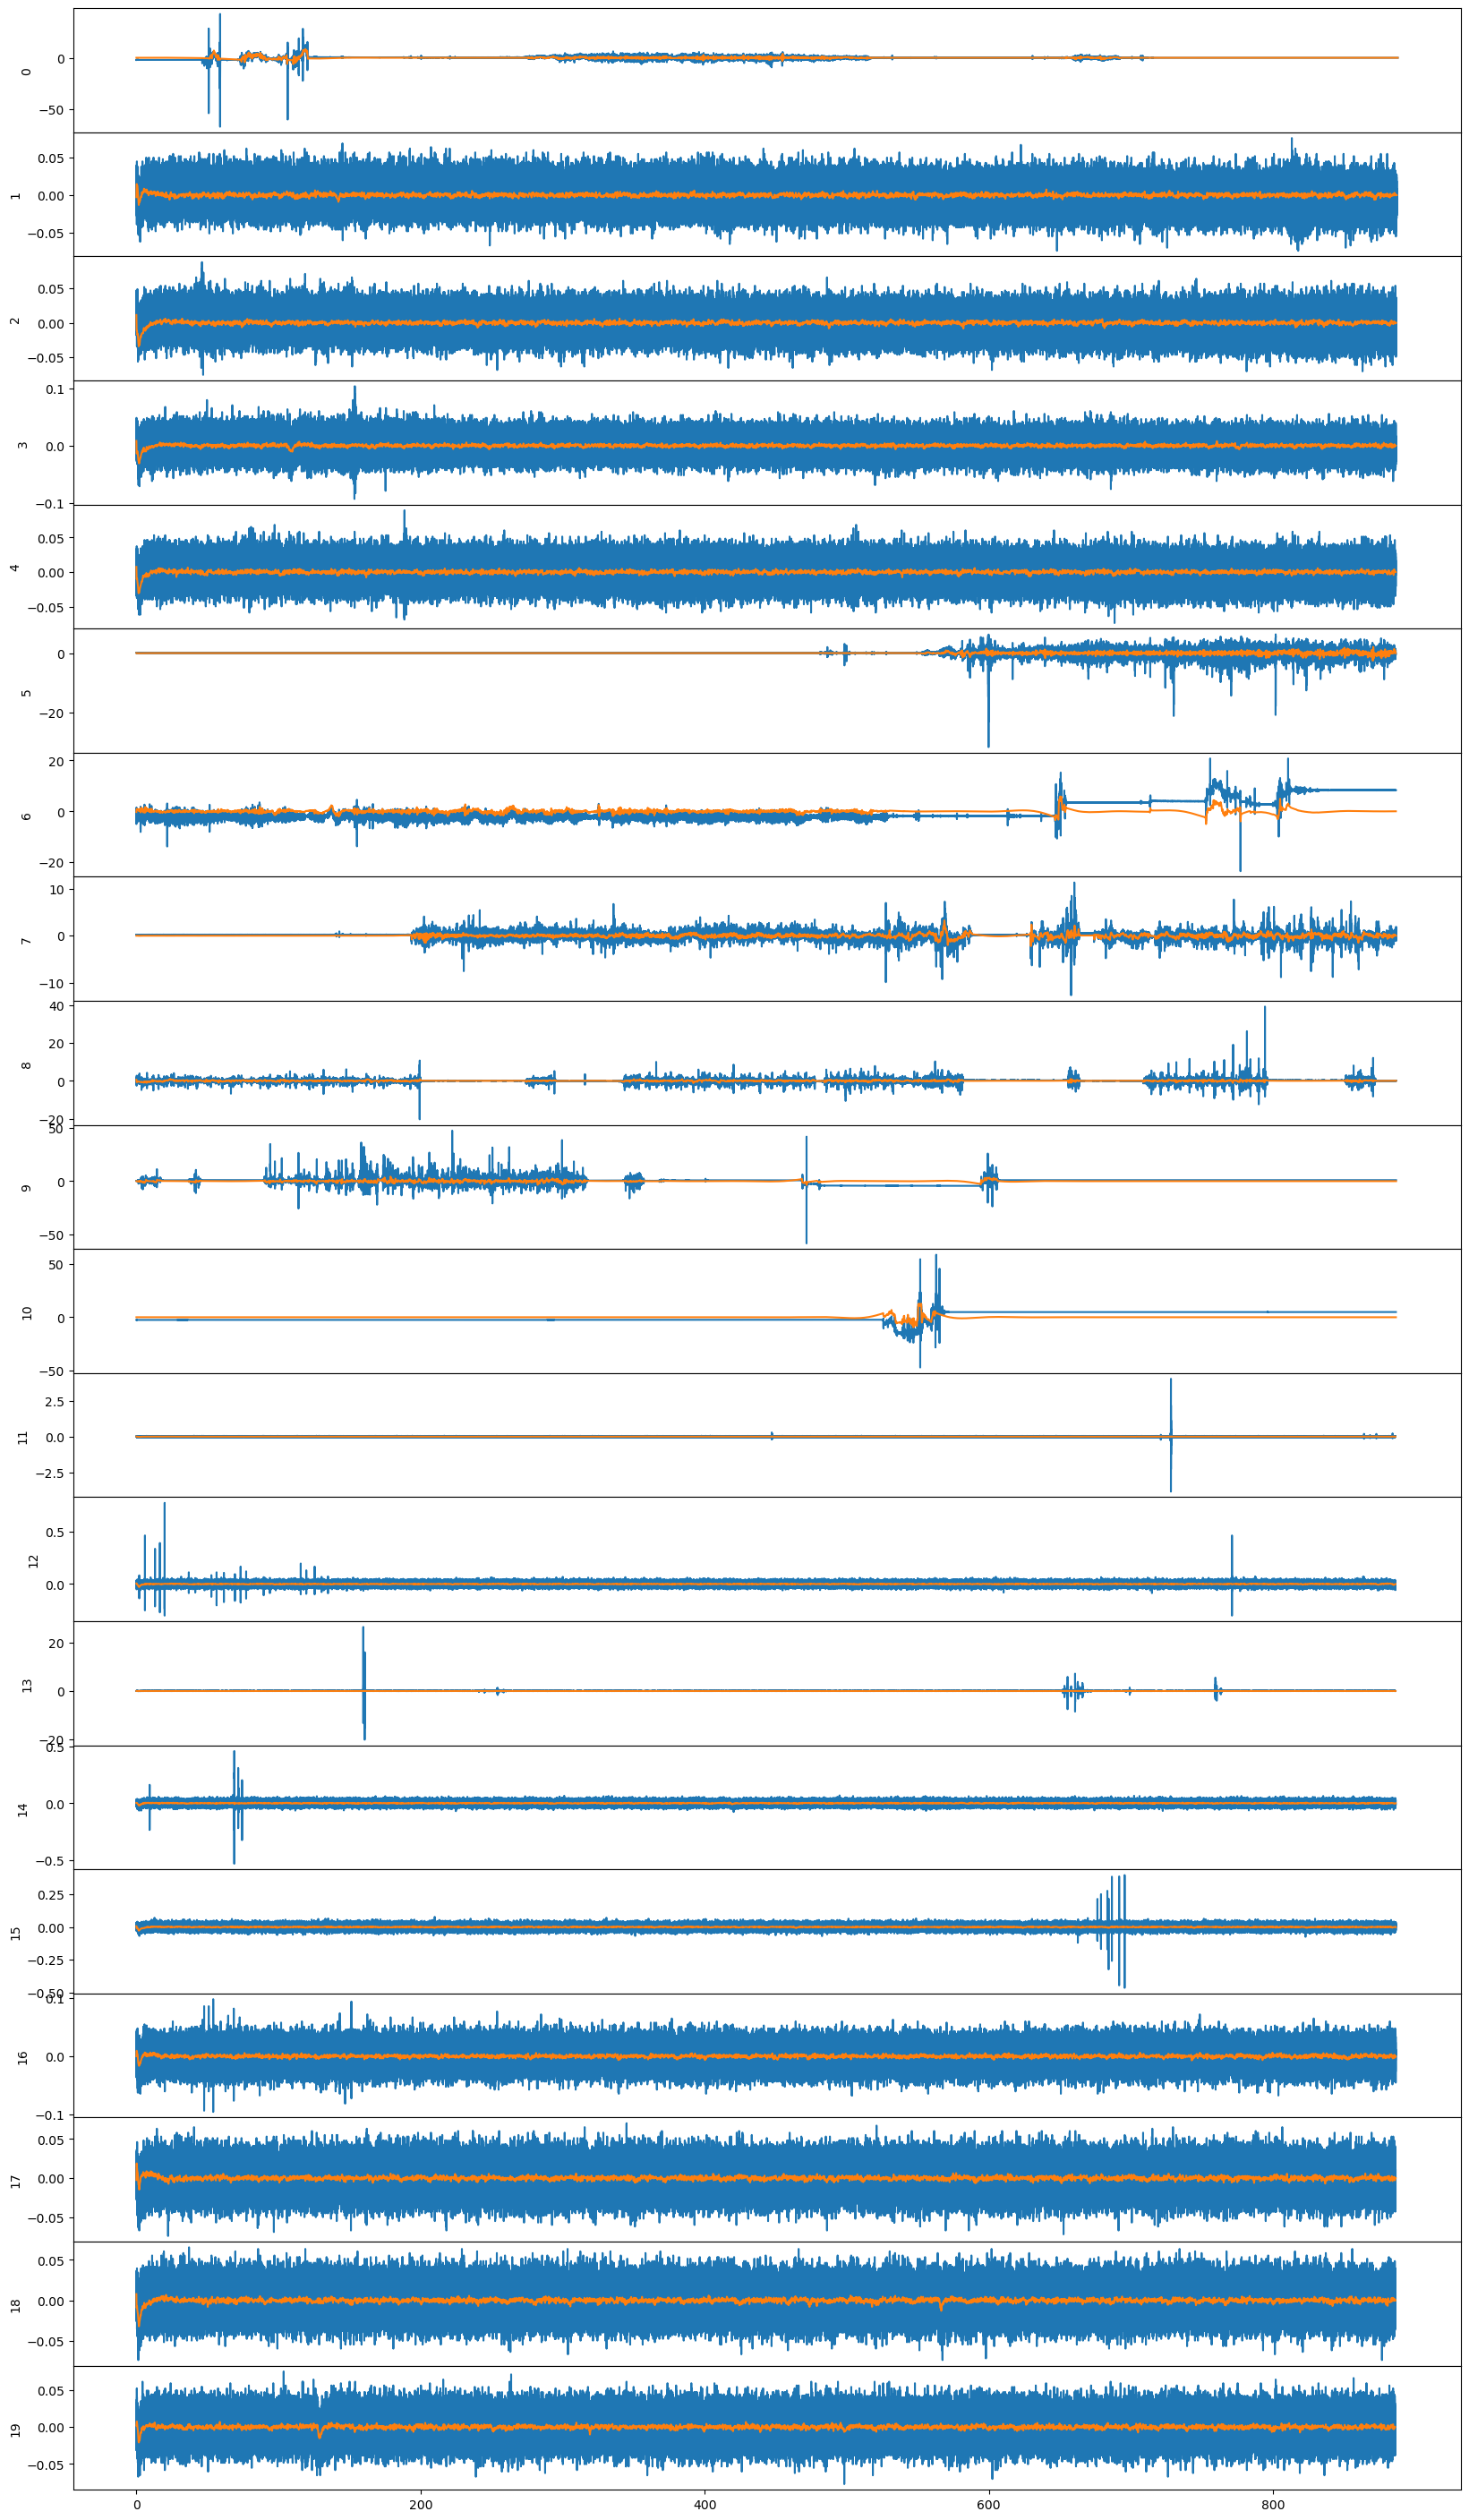

In [8]:
dic.keys()

phone = 1
fig,axs = plt.subplots(figsize=(20,18*2),nrows=20,sharex=True)
for i,ax in zip(range(20),axs):
    filename = datas[phone]['filelist'][i]
    data = rw.read_csv(filename,delimiter=',')
    dic = dataphone.read_raw(data,'a')
    
    t = dic['ta']
    y = dic['az']
    t = t-t[0]
    y = y-np.mean(y)
    ax.plot(t,y)
    y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.0001)
    ax.plot(t,y_wave)    
    ax.set_ylabel(i)
fig.subplots_adjust(hspace=0)



In [9]:
dic.keys()

phone = 1
fig,axs = plt.subplots(figsize=(20,18*2.5),nrows=35,sharex=True)
for i,ax in zip(range(18,53),axs):
    filename = datas[phone]['filelist'][i]
    data = rw.read_csv(filename,delimiter=',')
    dic = dataphone.read_raw(data,'a')
    
    t = dic['ta']
    y = dic['az']
    t = t-t[0]
    y = y-np.mean(y)
    ax.plot(t,y)
    y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.0001)
    ax.plot(t,y_wave)    
fig.subplots_adjust(hspace=0)



Error in callback <function flush_figures at 0x755150430ea0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
dic.keys()

phone = 1
fig,axs = plt.subplots(figsize=(20,18*2.5),nrows=35,sharex=True)
for i,ax in zip(range(53,57),axs):
    filename = datas[phone]['filelist'][i]
    data = rw.read_csv(filename,delimiter=',')
    dic = dataphone.read_raw(data,'a')
    
    t = dic['ta']
    y = dic['az']
    t = t-t[0]
    y = y-np.mean(y)
    ax.plot(t,y)
    y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.0001)
    ax.plot(t,y_wave)    
    ax.set_ylim(-0.05,0.05)
    ax.set_xlim(100,200)
fig.subplots_adjust(hspace=0)



KeyboardInterrupt: 

In [8]:
folder = base +f'Data/{date}/Phone/Tsync/'
filesync = folder + 'tsync_1738853637.txt'

synctable = rw.read_csv(filesync,delimiter=',')
synctable = rw.csv2dict(synctable)

timetable = {}
phonelist = []
#t0 = synctable['0_0']['t0']
for key in synctable:
    phone,i = key.split('_')
    phone = int(phone)
    if not phone in phonelist:
        phonelist.append(phone)
        timetable[phone]=[]
    timetable[phone].append(synctable[key]['tlag'])

for phone in phonelist:
    timetable[phone] = np.mean(timetable[phone])
pprint(timetable)

for phone in datas.keys():
    datas[phone]['tref']=timetable[phone]

['phone', 'iter', 'tlag', 'dtmedian', 'tmin', 'tmax', 'tstd', 'n', 't0']
['1_0', '1', '0', '1738848442.1988559', '0.0016173620000000002', '1738848442.1985602', '1738848442.1990857', '0.00011410136313866452', '50', '1738853574.0269525']
['2_0', '2', '0', '1738848449.881998', '0.001971494', '1738848449.8817668', '1738848449.8822184', '0.00010373140571608224', '50', '1738853574.6024015']
['3_0', '3', '0', '1738848475.0400636', '0.0020572010000000003', '1738848475.0398757', '1738848475.0402207', '9.749458993500487e-05', '50', '1738853575.367851']
['4_0', '4', '0', '1738848454.8003325', '0.0013606795000000002', '1738848454.8001194', '1738848454.800468', '8.524810911373303e-05', '50', '1738853576.676181']
['5_0', '5', '0', '1738848462.4320765', '0.001309538', '1738848462.4318838', '1738848462.4323432', '9.701380596400548e-05', '50', '1738853577.3308058']
['6_0', '6', '0', '1738848477.7166438', '0.001579368', '1738848477.7163386', '1738848477.7167535', '0.00012040892662358699', '50', '1738853

In [10]:
folder = base +f'Data/{date}/Phone/Tsync/'
filesync = folder + 'tsync_1738853637.txt'

synctable = rw.read_csv(filesync,delimiter=',')
synctable = rw.csv2dict(synctable)

timetable = {}
phonelist = []
#t0 = synctable['0_0']['t0']
for key in synctable:
    phone,i = key.split('_')
    phone = int(phone)
    if not phone in phonelist:
        phonelist.append(phone)
        timetable[phone]=[]
    timetable[phone].append(synctable[key]['tlag'])

for phone in phonelist:
    timetable[phone] = np.mean(timetable[phone])
pprint(timetable)

for phone in datas.keys():
    datas[phone]['tref']=timetable[phone]

['phone', 'iter', 'tlag', 'dtmedian', 'tmin', 'tmax', 'tstd', 'n', 't0']
['1_0', '1', '0', '1738848442.1988559', '0.0016173620000000002', '1738848442.1985602', '1738848442.1990857', '0.00011410136313866452', '50', '1738853574.0269525']
['2_0', '2', '0', '1738848449.881998', '0.001971494', '1738848449.8817668', '1738848449.8822184', '0.00010373140571608224', '50', '1738853574.6024015']
['3_0', '3', '0', '1738848475.0400636', '0.0020572010000000003', '1738848475.0398757', '1738848475.0402207', '9.749458993500487e-05', '50', '1738853575.367851']
['4_0', '4', '0', '1738848454.8003325', '0.0013606795000000002', '1738848454.8001194', '1738848454.800468', '8.524810911373303e-05', '50', '1738853576.676181']
['5_0', '5', '0', '1738848462.4320765', '0.001309538', '1738848462.4318838', '1738848462.4323432', '9.701380596400548e-05', '50', '1738853577.3308058']
['6_0', '6', '0', '1738848477.7166438', '0.001579368', '1738848477.7163386', '1738848477.7167535', '0.00012040892662358699', '50', '1738853

In [11]:
datas[1].keys()

dict_keys(['filelist', 'tref'])

In [12]:
phone = 1
tref = timetable[phone]

In [25]:
filename.split('-')

['/media/turbots/BlueDisk/Shack25_local/Data/0206/Phone/1/',
 '2025',
 '02',
 '06T09_54_22',
 'android.sensor.accelerometer',
 '1',
 '5220274749',
 '6107979002.csv']

In [13]:

m = {}

phonelist = [1,2,3]
for phone in phonelist:
    tref = timetable[phone]
    for filename in datas[phone]['filelist']: 
        if not phone in m.keys():
            m[phone]={}
        num = int(filename.split('-')[5])
        if num>11 and num<16:
            m[phone][num]={}
            dic = dataphone.load_data(filename)
            #print(phone,dic.keys())
            for key in dic.keys():
                m[phone][num][key]=dic[key]
            m[phone][num]['ta_s'] = dic['ta']+tref#-datas[phone]['tstart']
            print(phone,num,np.std(m[phone][num]['az']))

1 12 0.026115179297942943
1 13 0.01569181254586673
1 14 0.13647452460425696
1 15 0.01569837221069109
2 12 0.015532458167543032
2 13 0.01543074699450581
2 14 5.135541219084807
2 15 0.015523752382207323
3 12 0.015928977101334712
3 13 0.016248041207571232
3 14 7.116019383355022
3 15 3.926934314438052


In [44]:
import scipy.signal as sig

In [71]:
moy = np.mean(dic['az'])
sigma = np.std(dic['az'])

part = np.sum(np.abs(dic['az']-moy)<5*sigma)
print(part/len(dic['az']))

0.9997416666666666


In [73]:
m.keys()

dict_keys([1, 2, 3])

In [72]:
phone = 1
print(m[phone][num].keys())
print(phone,num)

KeyError: 79

In [ ]:
#local_time, phone, number, variable, tag, A_wave, f, GPS_phone, GPS_Garmin, filename


['12:36:54']
46230
['12:51:40']
46230
['12:37:02']
46230
['12:51:48']
46230
['12:37:03']
46230
['12:51:49']
46230
['12:36:54']
46230
['12:51:40']
46230
['12:37:02']
46230
['12:51:48']
46230
['12:37:03']
46230
['12:51:49']
46230
['12:36:54']
46230
['12:51:40']
46230
['12:37:02']
46230
['12:51:48']
46230
['12:37:03']
46230
['12:51:49']
46230


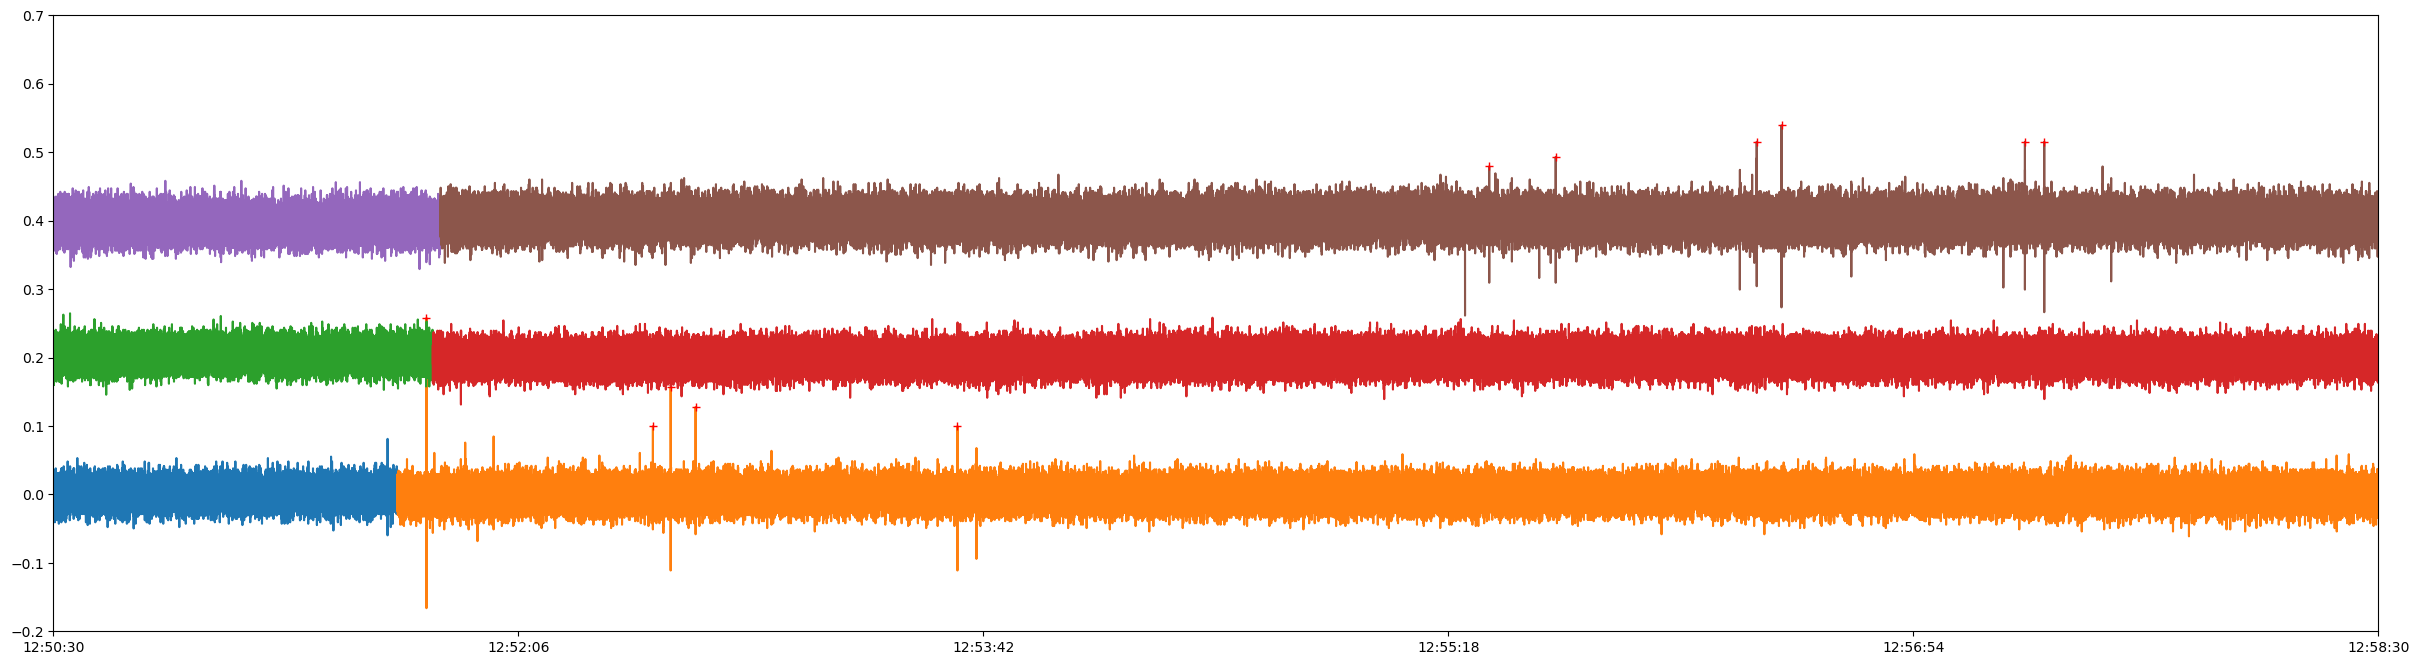

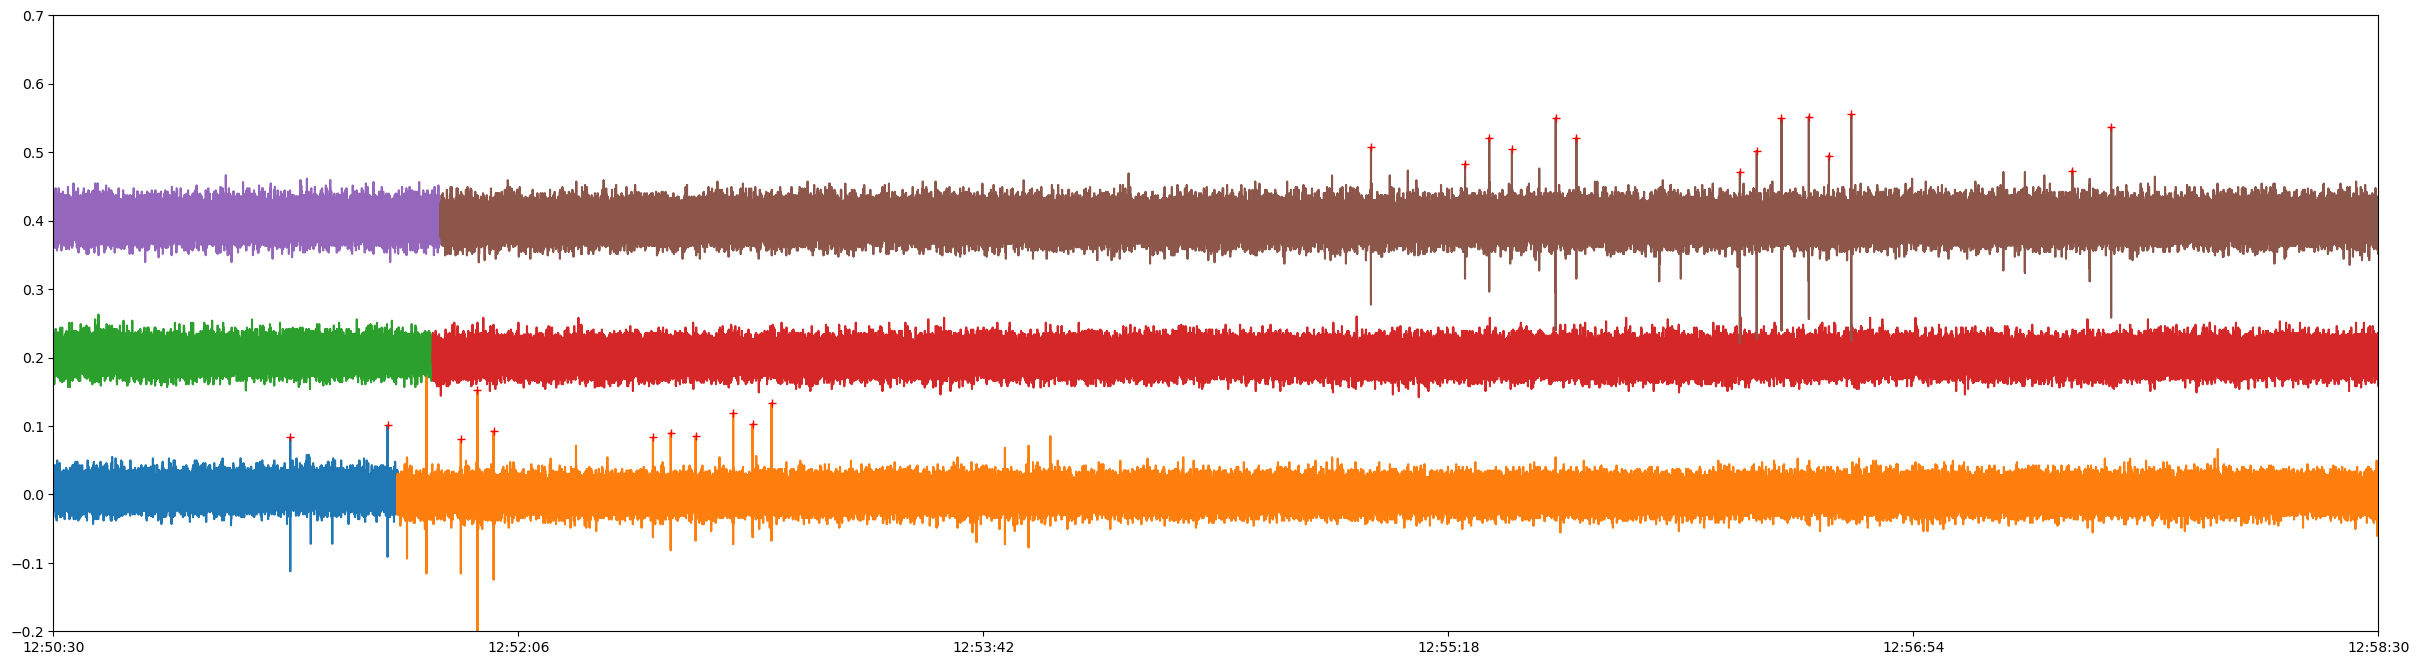

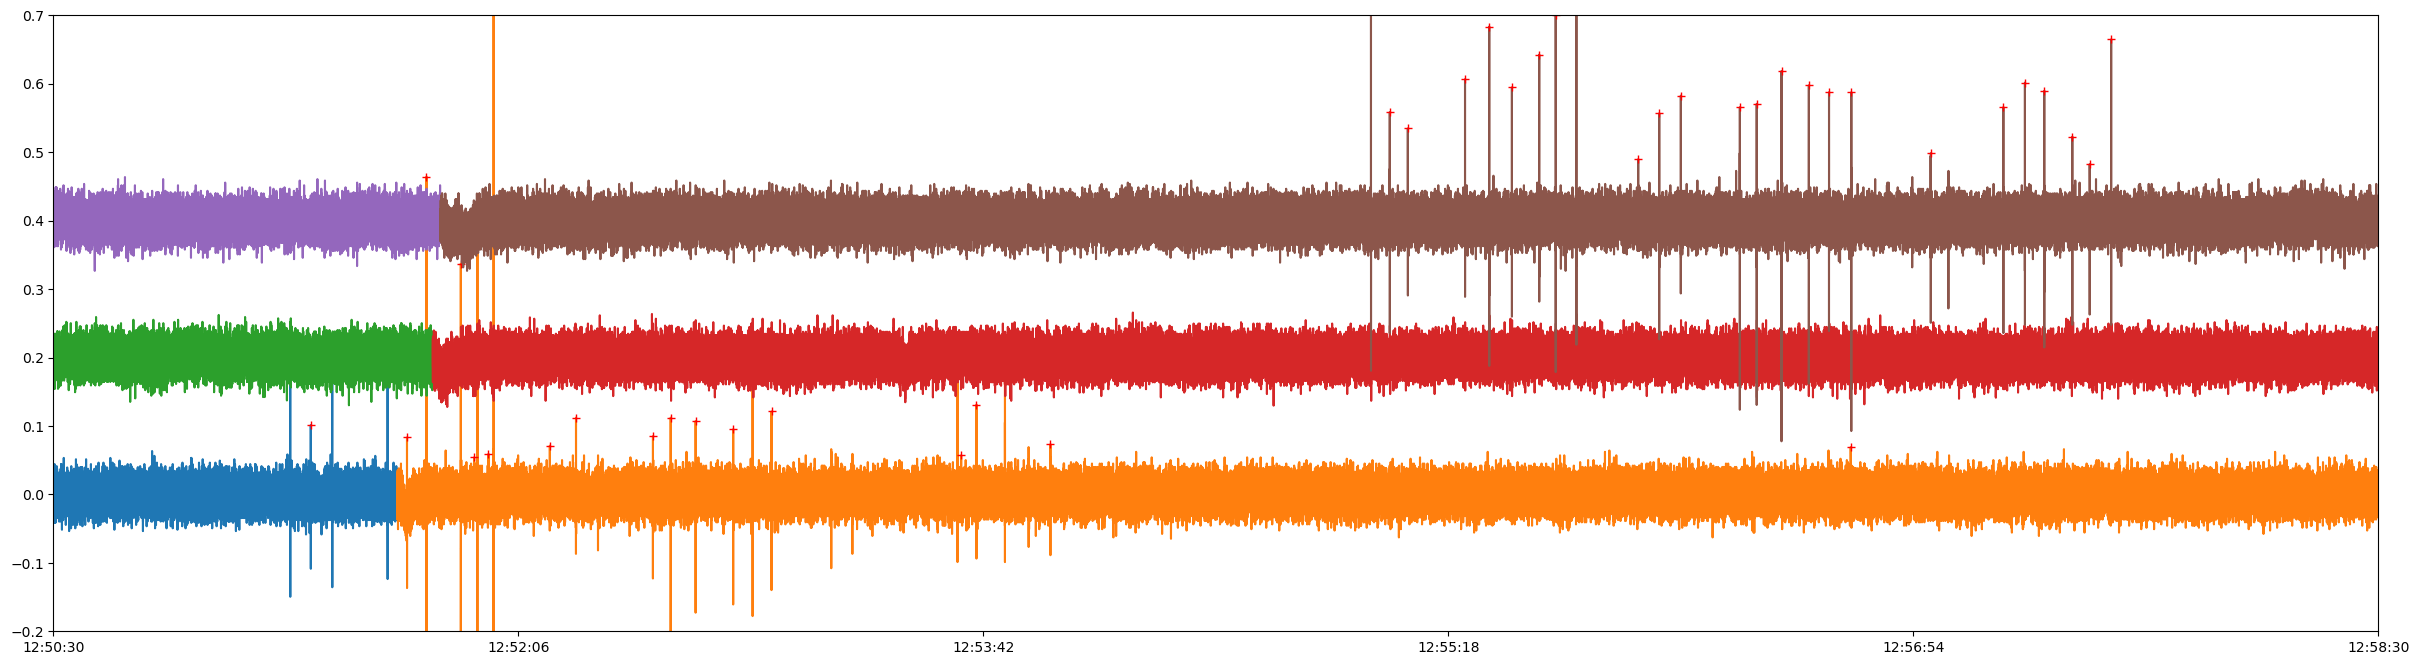

In [68]:
m.keys()

dic.keys()

indices = range(12,14)
n = len(indices)

for c in m[1][12]['coords']:
    fig,ax = plt.subplots(figsize=(30,8))

    for j,phone in enumerate(phonelist):
        for i in indices:
            dic = m[phone][i]
            t = dic['ta_s']
            t = t-t[0]+timest.today_time([t[0]])[0]

            y = dic['a'+c]
            y = y-np.mean(y)
            ax.plot(t,y+j/5)
    #        y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.0001)

            print(timest.display_time([t[0]]))
            peaks,props = sig.find_peaks(y, prominence=0.15,distance=200)

            ax.plot(t[peaks],y[peaks]+j/5,'r+')        
            tmin = multi.convert_time('12:50:30')
            tmax = multi.convert_time('12:58:30')
            plt.xlim([tmin,tmax])
            #plt.xlim([46501.95,46502.1])
            #plt.xlim([46586.7,46586.9])
            #plt.xlim([46526.4,46526.5])
            ticks = np.linspace(tmin,tmax,6)
            ax.set_xticks(ticks,timest.display_time(ticks))

            print(tmin)
            ax.set_ylim(-0.2,0.7)
            #ax.set_xlim(100,200)                



In [37]:
22.5/(1/400*4)

2250.0

In [20]:
45/(1/400*15)

1200.0

['05:56:33']


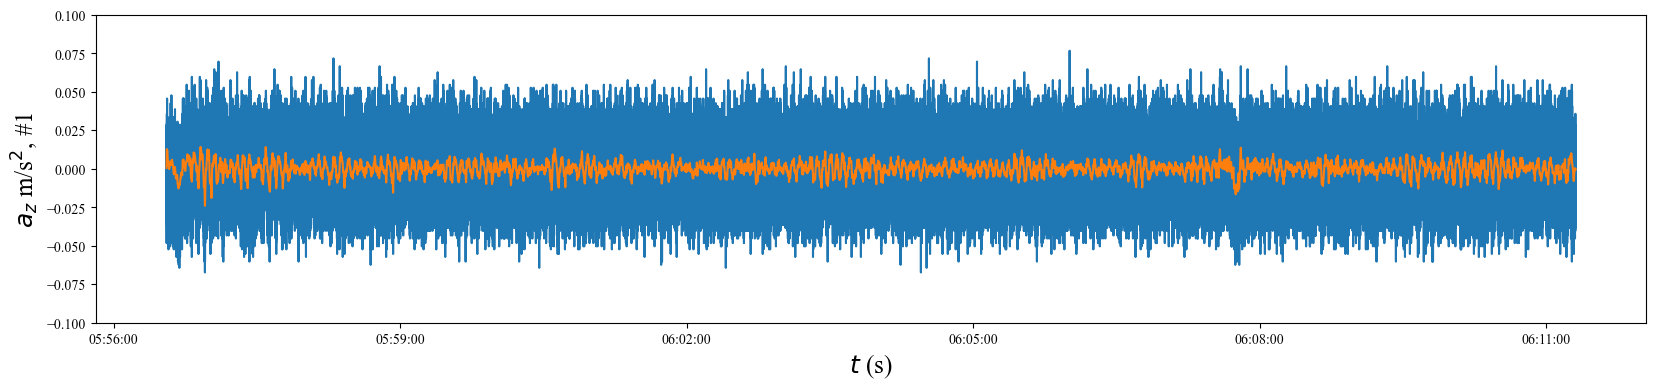

In [31]:
import icewave.field.time as timest


fig,ax = plt.subplots(figsize=(20,4))

phone = 1
num = 34
dic = m[num]

t = dic['ta_s']
y = dic['az']
y = y-np.mean(y)
y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.0001)


t = t-t[0]+timest.today_time([t[0]])[0]
print(timest.display_time([t[0]]))

ax.plot(t,y)
ax.plot(t,y_wave)

tmin = multi.convert_time('5:56:00')
tmax = multi.convert_time('6:11:00')
#plt.xlim([tmin,tmax])

ticks = np.linspace(tmin,tmax,6)
ax.set_xticks(ticks,timest.display_time(ticks))


ax.set_ylim(-0.1,0.1)
ylabel = '$a_z$ m/s$^2$, #'+str(phone)
figs = graphes.legende('$t$ (s)',ylabel,'',ax=ax)

#graphes.save_figs(figs,savedir=savefolder,prefix='12phones_exemple_')

21
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/21/accelerometer-21-85155494842-86036301309.csv
['19:03:26']
22
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/22/accelerometer-21-80818224587-81702886518.csv
['19:04:44']
23
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/23/accelerometer-21-85295878845-86181334609.csv
['19:05:00']
24
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/24/accelerometer-21-85308196950-86192942637.csv
['19:04:44']
25
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/25/accelerometer-21-85420308321-86309515119.csv
['19:06:19']
26
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/26/accelerometer-21-85443806293-86332959299.csv
['19:06:25']
27
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/27/accelerometer-21-85420169348-86305717838.csv
['19:05:04']
28
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/28/accelerometer-21-85511959620-86400502255.csv
['19:06:07']
29
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone

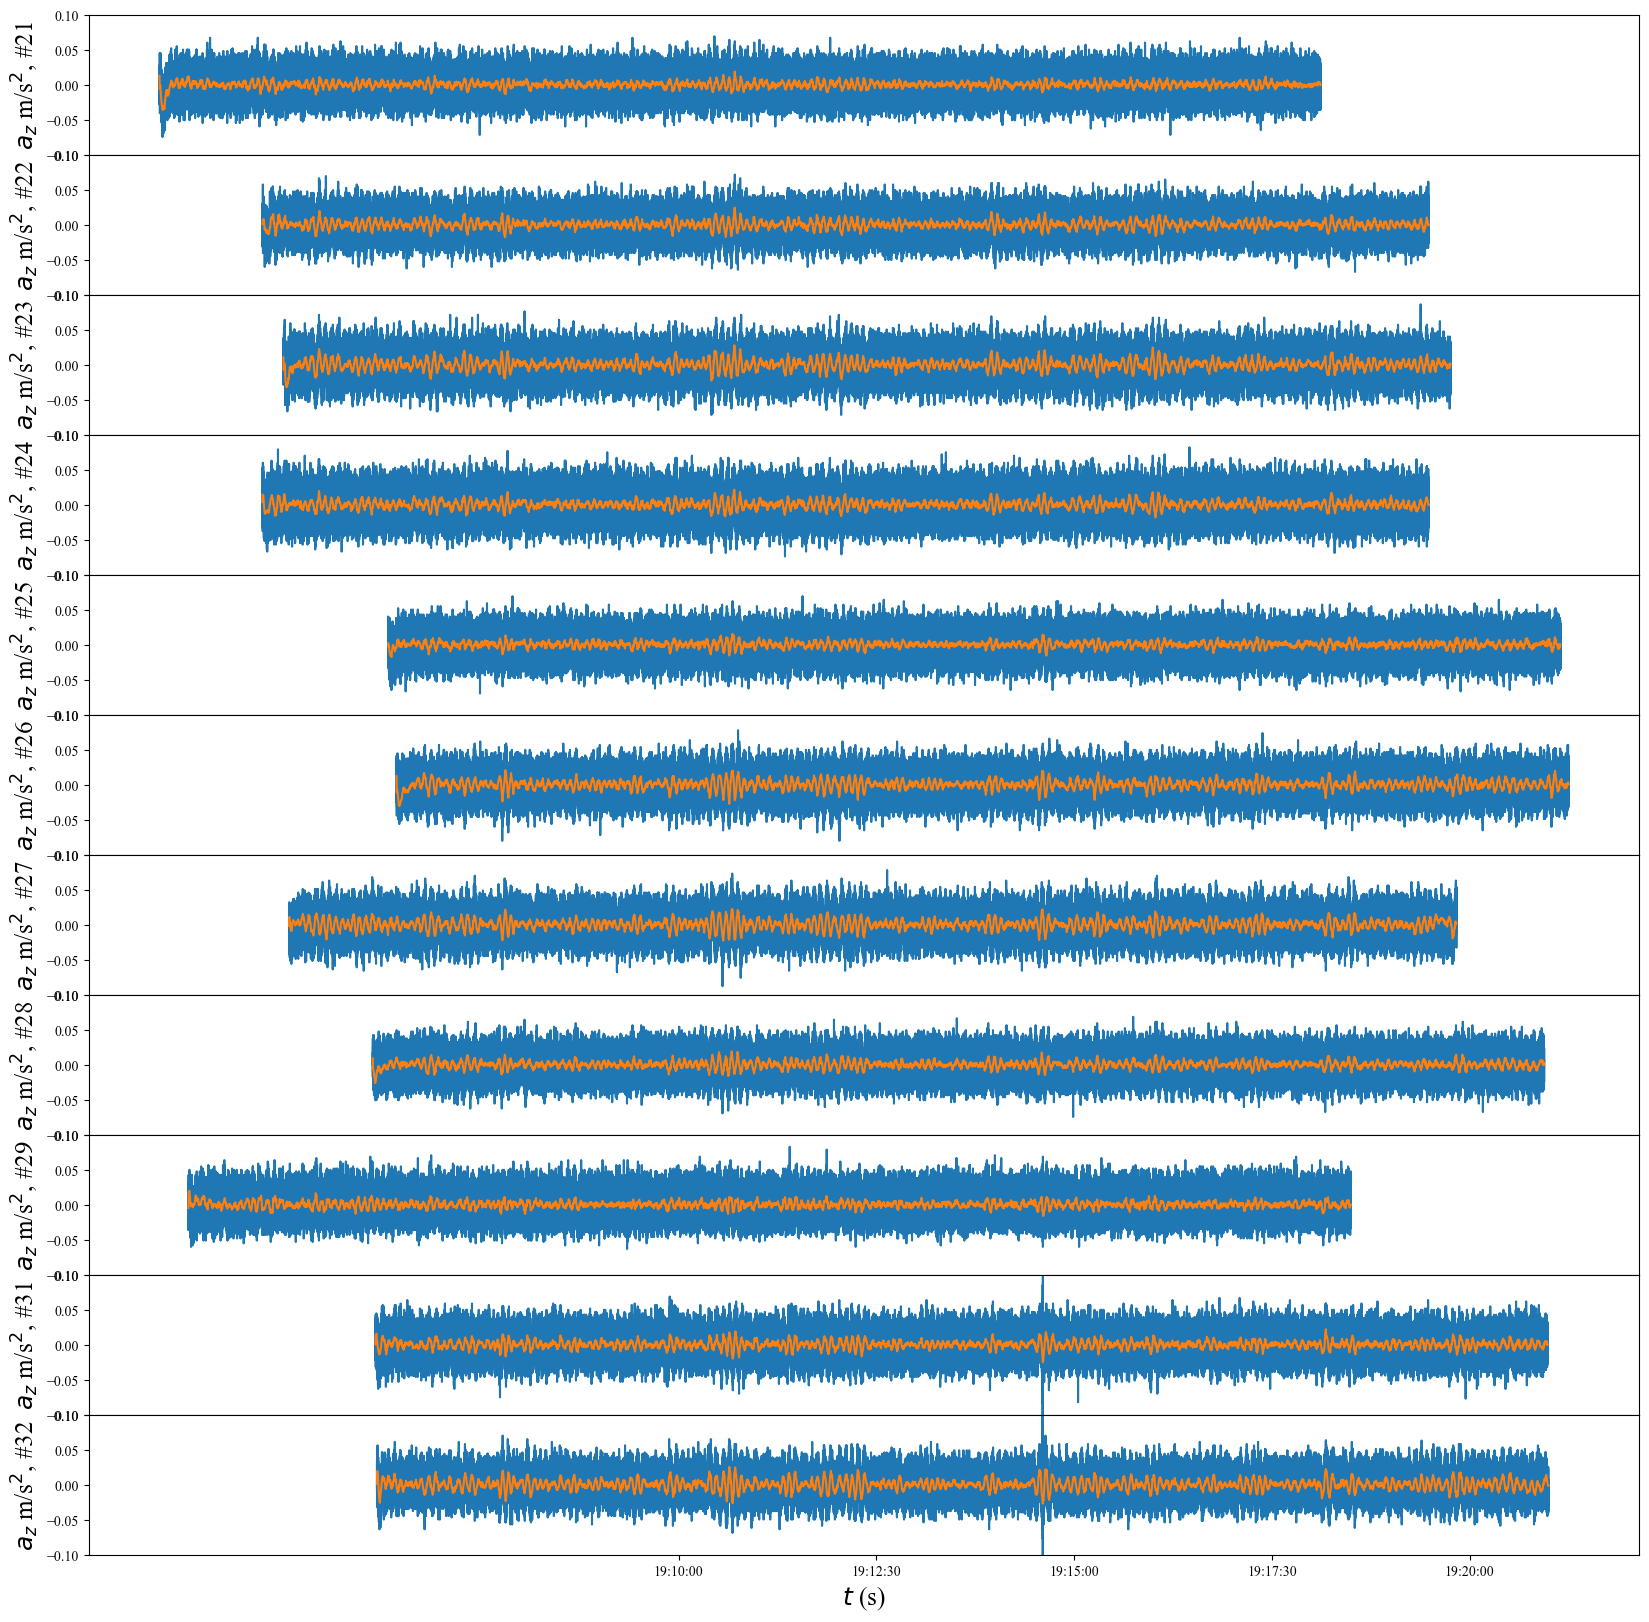

In [72]:
filename = selectfiles[5]

n = len(datas.keys())
fig,axs = plt.subplots(figsize=(20,20),nrows=n,sharex=True)

for ax,phone in zip(axs,datas.keys()):
    print(phone)
    filename = datas[phone]['filelist'][5]
    print(filename)
    dic = datas[phone]

    t = dic['ta_s']
    y = dic['az']

    y = y-np.mean(y)
    y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.0001)
    t = t-t[0]+timest.today_time([t[0]])[0]

    ax.plot(t,y)
    ax.plot(t,y_wave)
    #ax.set_xlim(410,480)
    ax.set_ylim(-0.1,0.1)
    ylabel = '$a_z$ m/s$^2$, #'+str(phone)
    figs = graphes.legende('',ylabel,'',ax=ax)
    
    print(timest.display_time([t[0]]))

    tmin = multi.convert_time('19:10:00')
    tmax = multi.convert_time('19:20:00')
    #plt.xlim([tmin,tmax])

    ticks = np.linspace(tmin,tmax,5)
    ax.set_xticks(ticks,timest.display_time(ticks))


fig.subplots_adjust(hspace=0)
figs = graphes.legende('$t$ (s)',ylabel,'',ax=ax)

#graphes.save_figs(figs,savedir=savefolder,prefix='12phones_exemple_')

0.0025000000023283064
21
['19:03:26']
245309
22
['19:04:44']
244246
23
['19:05:00']
244024
24
['19:04:44']
244222
25
['19:06:19']
242988
26
['19:06:25']
243014
27
['19:05:04']
243993
28
['19:06:07']
243176
29
['19:03:48']
245026
31
['19:06:09']
242999
32
['19:06:11']
243154


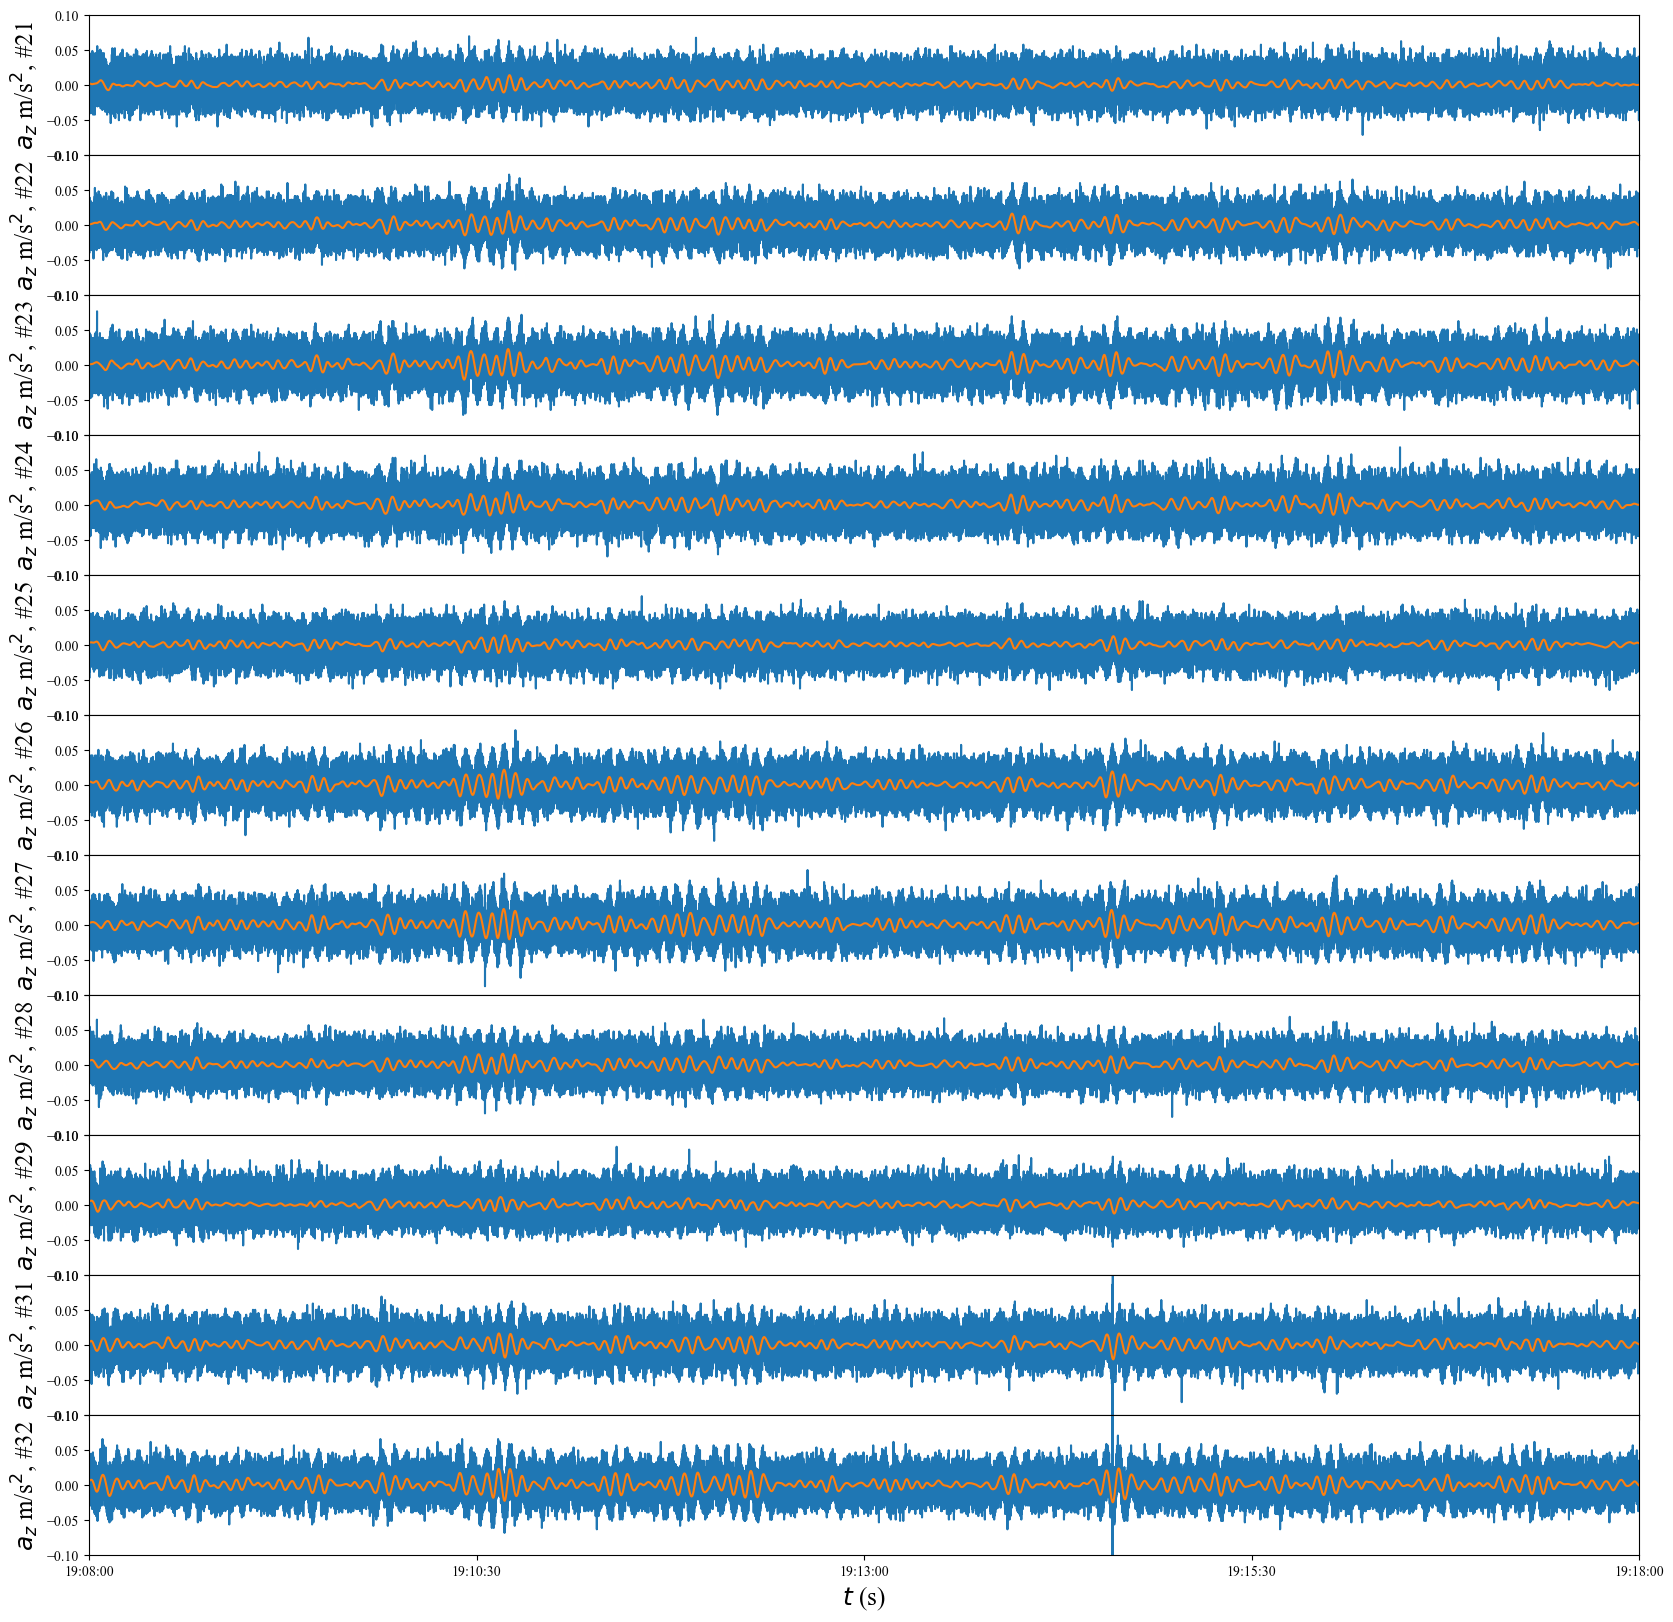

In [95]:
filename = selectfiles[5]

n = len(datas.keys())
fig,axs = plt.subplots(figsize=(20,20),nrows=n,sharex=True)

N = 240001
Z = np.zeros((n,N))
Zf = np.zeros((n,N))


tmin = multi.convert_time('19:08:00')
tmax = multi.convert_time('19:18:00')
ti = np.linspace(tmin,tmax,N)
print(np.diff(ti)[0])

for i,(ax,phone) in enumerate(zip(axs,datas.keys())):
    print(phone)
    dic = datas[phone]
    t = dic['ta_s']
    y = dic['az']

    y = y-np.mean(y)
    y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.002,flow=0.0001)
    t = t-t[0]+timest.today_time([t[0]])[0]

    ax.plot(t,y)
    ax.plot(t,y_wave)
    
    f = interp.interp1d(t, y, kind='cubic')
    yi = f(ti)
    Z[i,:]=yi
    
    ff = interp.interp1d(t, y_wave, kind='cubic')
    yi = ff(ti)
    Zf[i,:]=yi
    
    #ax.set_xlim(410,480)
    ax.set_ylim(-0.1,0.1)
    ylabel = '$a_z$ m/s$^2$, #'+str(phone)
    figs = graphes.legende('',ylabel,'',ax=ax)
    
    print(timest.display_time([t[0]]))

    plt.xlim([tmin,tmax])

    ticks = np.linspace(tmin,tmax,5)
    ax.set_xticks(ticks,timest.display_time(ticks))

    eps = 0.1
    indices = np.logical_and(t>=tmin-eps,t<=tmax+eps)
    print(np.sum(indices))
fig.subplots_adjust(hspace=0)
figs = graphes.legende('$t$ (s)',ylabel,'',ax=ax)

#graphes.save_figs(figs,savedir=savefolder,prefix='12phones_exemple_')

(50000.0, 100000.0)

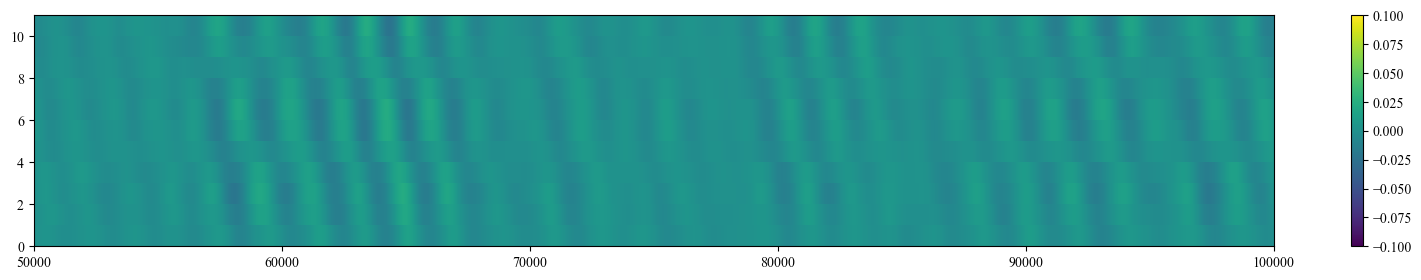

In [111]:
fig,ax=plt.subplots(figsize=(20,3))
plt.pcolormesh(Zf,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.xlim(50000,100000)

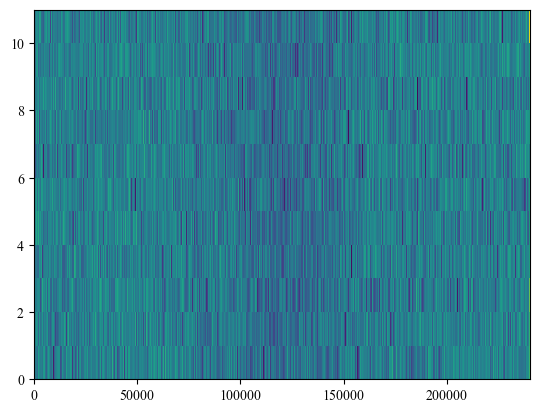

In [92]:
Tf = np.fft.fft2(Zf)

plt.pcolormesh(np.abs(np.log10(Tf)))

21
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/21/accelerometer-21-85155494842-86036301309.csv
21 9.799011919000002 0.013495793643253736 0.016240978110665202 0.014935406147191117
['19:03:26']
22
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/22/accelerometer-21-80818224587-81702886518.csv
22 9.727643039391669 0.01459117925802579 0.014540940907803777 0.014967028434082378
['19:04:44']
23
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/23/accelerometer-21-85295878845-86181334609.csv
23 9.811913996349997 0.015915606534955887 0.017006945494269086 0.016662263503136914
['19:05:00']
24
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/24/accelerometer-21-85308196950-86192942637.csv
24 9.807181081327775 0.016030738851429784 0.019793150659926817 0.01705228101048879
['19:04:44']
25
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/25/accelerometer-21-85420308321-86309515119.csv
25 9.879901644188886 0.012622398057976618 0.018668420938894044 0.01530608857868747
['19:0

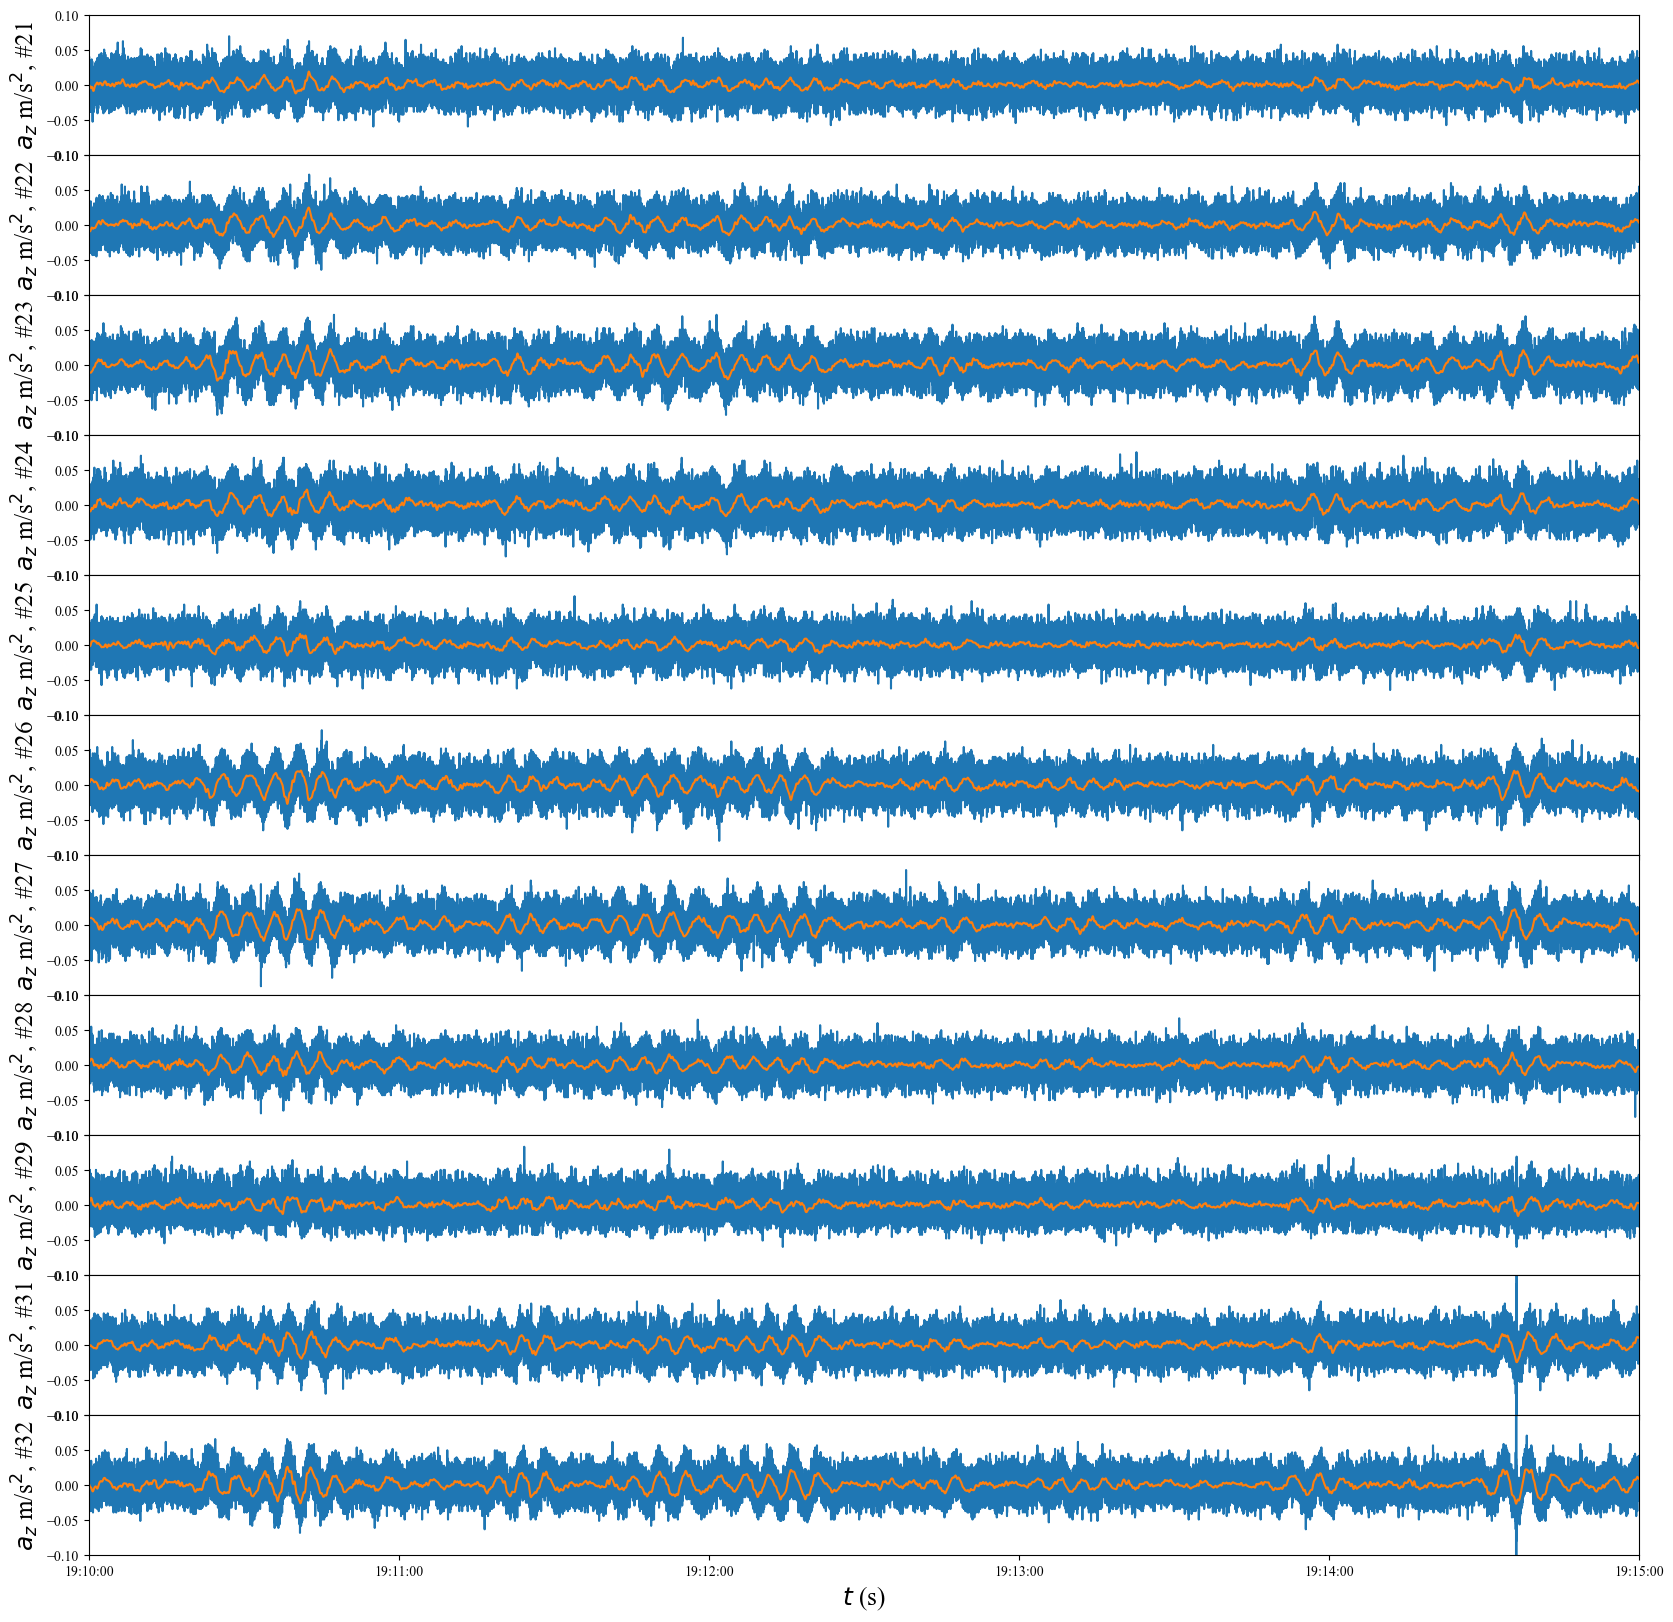

In [64]:
filename = selectfiles[5]

n = len(datas.keys())
fig,axs = plt.subplots(figsize=(20,20),nrows=n,sharex=True)

for ax,phone in zip(axs,datas.keys()):
    print(phone)
    filename = datas[phone]['filelist'][5]
    print(filename)
    dic = dataphone.load_data(filename)

    print(phone,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))
    t = dic['ta']+datas[phone]['tref']#-datas[phone]['tstart']
    y = dic['az']
    y = y-np.mean(y)
    y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.0001)
    t = t-t[0]+timest.today_time([t[0]])[0]

    ax.plot(t,y)
    ax.plot(t,y_wave)
    #ax.set_xlim(410,480)
    ax.set_ylim(-0.1,0.1)
    ylabel = '$a_z$ m/s$^2$, #'+str(phone)
    figs = graphes.legende('',ylabel,'',ax=ax)
    
    print(timest.display_time([t[0]]))

    tmin = multi.convert_time('19:10:00')
    tmax = multi.convert_time('19:15:00')
    plt.xlim([tmin,tmax])

    ticks = np.linspace(tmin,tmax,6)
    ax.set_xticks(ticks,timest.display_time(ticks))


fig.subplots_adjust(hspace=0)
figs = graphes.legende('$t$ (s)',ylabel,'',ax=ax)

#graphes.save_figs(figs,savedir=savefolder,prefix='12phones_exemple_')

21
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/21/accelerometer-21-85155494842-86036301309.csv
21 9.799011919000002 0.013495793643253736 0.016240978110665202 0.014935406147191117
['19:03:26']
22
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/22/accelerometer-21-80818224587-81702886518.csv
22 9.727643039391669 0.01459117925802579 0.014540940907803777 0.014967028434082378
['19:04:44']
23
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/23/accelerometer-21-85295878845-86181334609.csv
23 9.811913996349997 0.015915606534955887 0.017006945494269086 0.016662263503136914
['19:05:00']
24
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/24/accelerometer-21-85308196950-86192942637.csv
24 9.807181081327775 0.016030738851429784 0.019793150659926817 0.01705228101048879
['19:04:44']
25
/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/25/accelerometer-21-85420308321-86309515119.csv
25 9.879901644188886 0.012622398057976618 0.018668420938894044 0.01530608857868747
['19:0

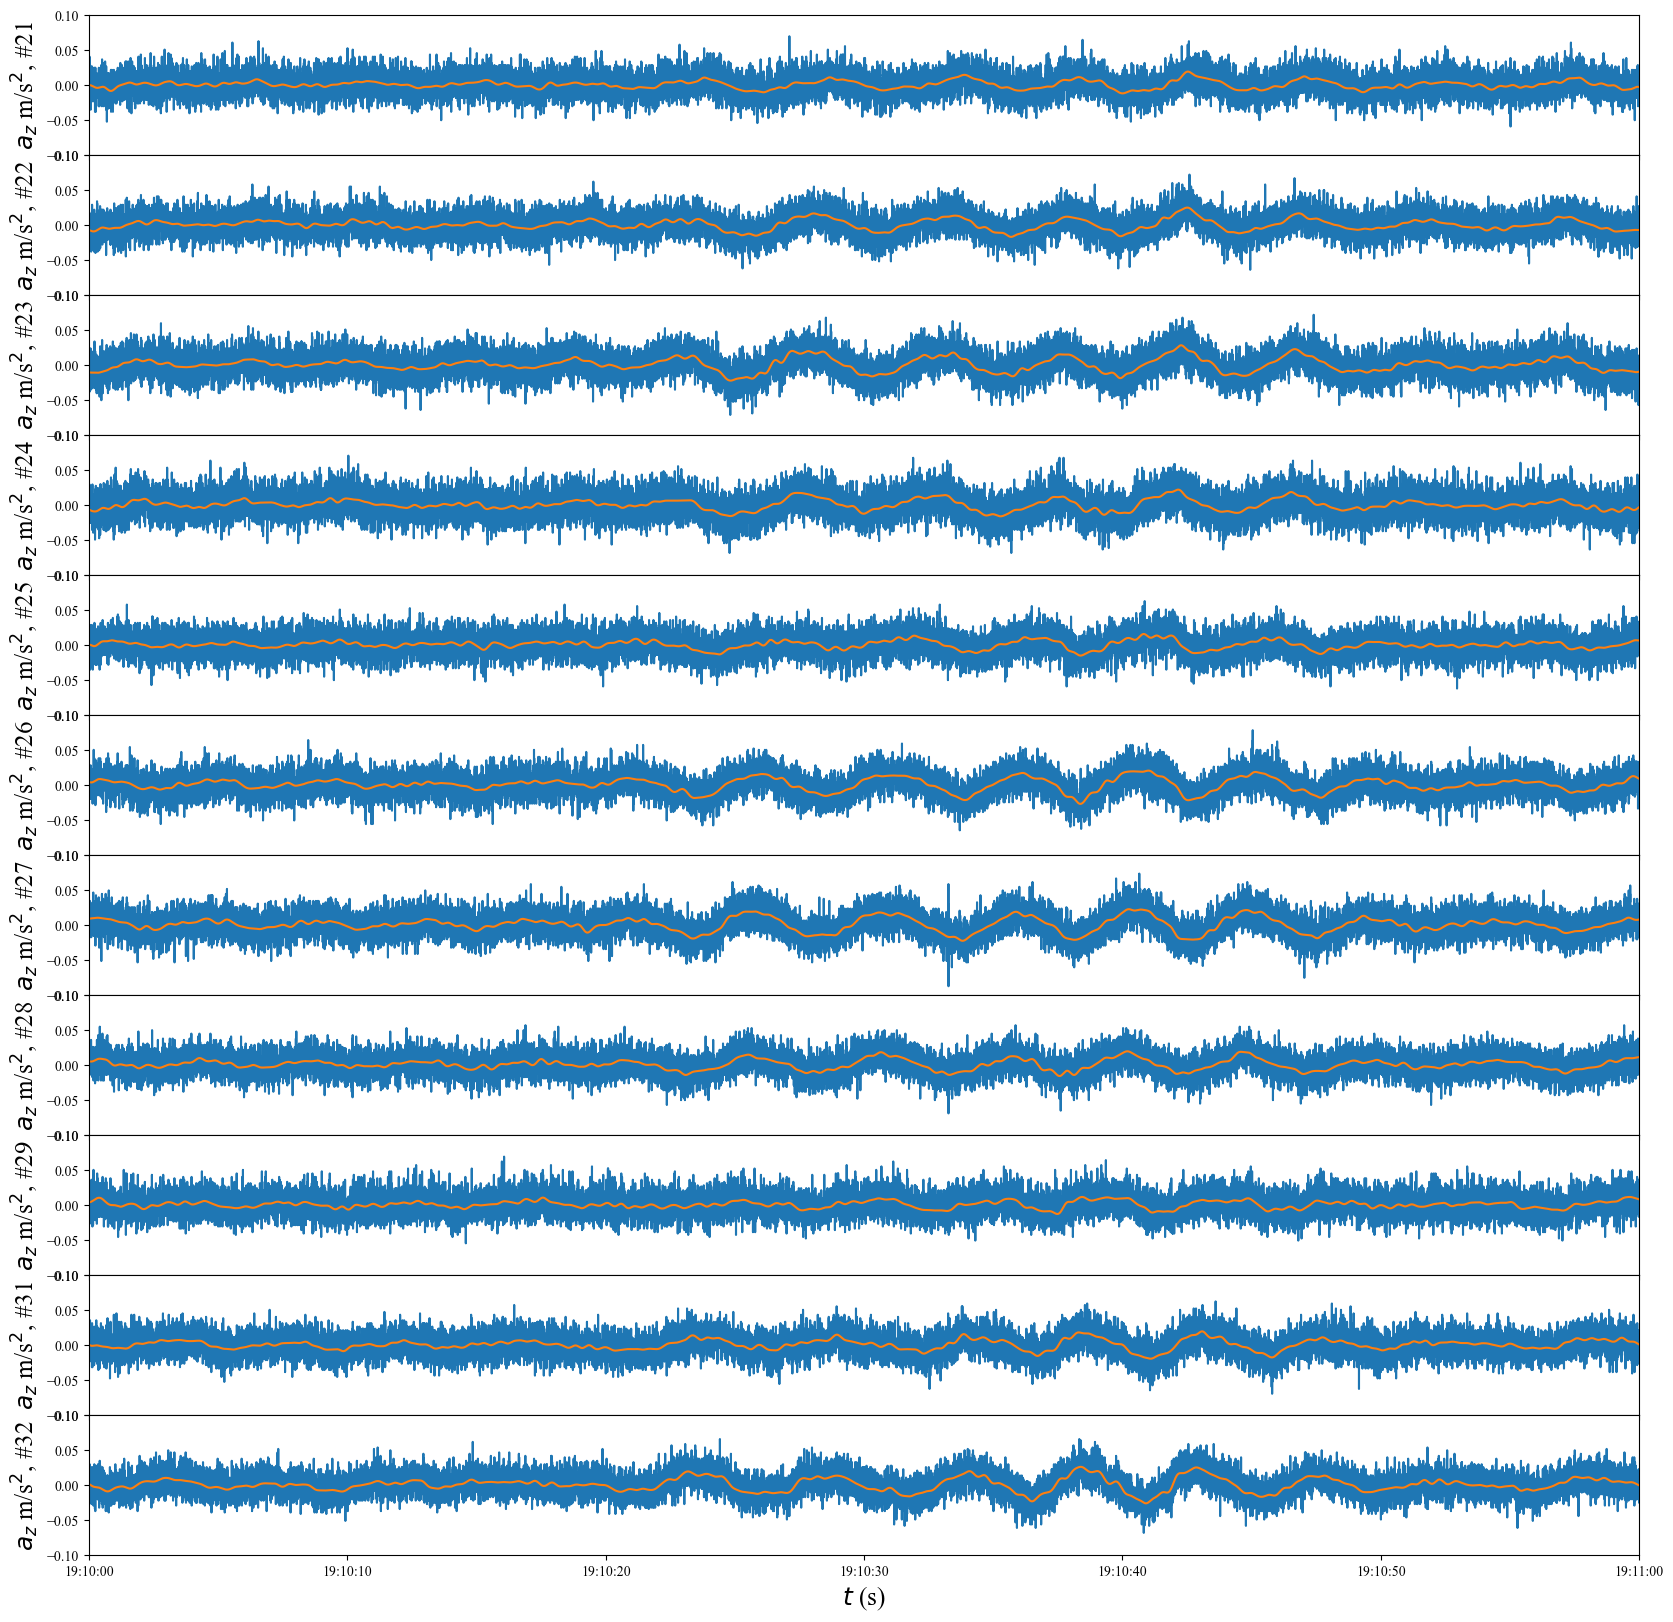

In [63]:
filename = selectfiles[5]

n = len(datas.keys())
fig,axs = plt.subplots(figsize=(20,20),nrows=n,sharex=True)

for ax,phone in zip(axs,datas.keys()):
    print(phone)
    filename = datas[phone]['filelist'][5]
    print(filename)
    dic = dataphone.load_data(filename)

    print(phone,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))
    t = dic['ta']+datas[phone]['tref']#-datas[phone]['tstart']
    y = dic['az']
    y = y-np.mean(y)
    y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.0001)
    t = t-t[0]+timest.today_time([t[0]])[0]

    ax.plot(t,y)
    ax.plot(t,y_wave)
    #ax.set_xlim(410,480)
    ax.set_ylim(-0.1,0.1)
    ylabel = '$a_z$ m/s$^2$, #'+str(phone)
    figs = graphes.legende('',ylabel,'',ax=ax)
    
    print(timest.display_time([t[0]]))

    tmin = multi.convert_time('19:10:00')
    tmax = multi.convert_time('19:11:00')
    plt.xlim([tmin,tmax])

    ticks = np.linspace(tmin,tmax,7)
    ax.set_xticks(ticks,timest.display_time(ticks))


fig.subplots_adjust(hspace=0)
figs = graphes.legende('$t$ (s)',ylabel,'',ax=ax)

#graphes.save_figs(figs,savedir=savefolder,prefix='12phones_exemple_')

In [14]:
filename = '/media/turbots/BlueDisk/Shack25_local/Data/0203/Phone/21/accelerometer-16-80751610879-81632408797.csv'

data = rw.read_csv(filename,delimiter=',')



[['ta', 'ax', 'ay', 'az'],
 ['80751610879.0', '0.33405003', '-0.19695', '9.79605'],
 ['80751613326.0', '0.34605002', '-0.18300001', '9.77505'],
 ['80751615773.0', '0.33900002', '-0.15900001', '9.79605'],
 ['80751618220.0', '0.351', '-0.18705001', '9.79605'],
 ['80751620667.0', '0.35295', '-0.15405001', '9.780001'],
 ['80751623114.0', '0.33405003', '-0.171', '9.790951'],
 ['80751625561.0', '0.32205', '-0.18', '9.7890005'],
 ['80751628007.0', '0.31500003', '-0.15105', '9.7890005'],
 ['80751630454.0', '0.32205', '-0.156', '9.8230505'],
 ['80751632901.0', '0.33705002', '-0.14400001', '9.82695'],
 ['80751635348.0', '0.33405003', '-0.17295001', '9.79605'],
 ['80751637794.0', '0.31995', '-0.13995', '9.78195'],
 ['80751640241.0', '0.32205', '-0.135', '9.772051'],
 ['80751642688.0', '0.31305', '-0.18300001', '9.80595'],
 ['80751645134.0', '0.33', '-0.18300001', '9.79905'],
 ['80751647581.0', '0.33705002', '-0.15405001', '9.790951'],
 ['80751650028.0', '0.37305', '-0.16095', '9.802951'],
 ['8075

21 9.798486502520834 0.013220838318506215 0.014362392525235967 0.014458625863165347


(0.0, 900.0)

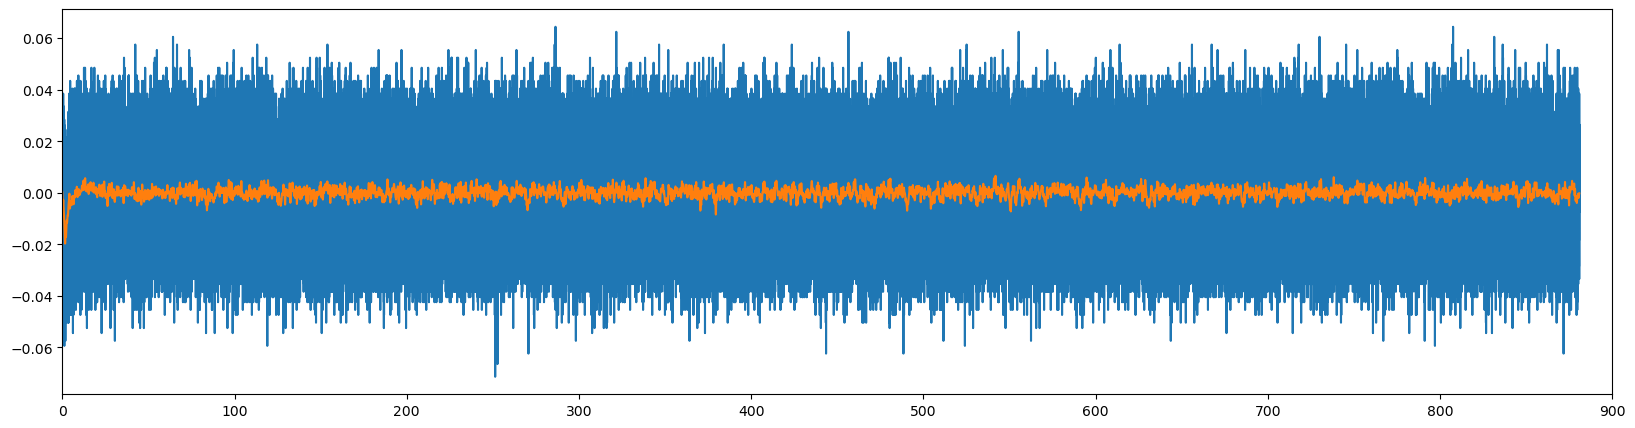

In [47]:
dic = rw.csv2dict(data)

fig,ax = plt.subplots(figsize=(20,5))

phone = 21
coords = ['x','y','z']
T = np.asarray(dic['ta']).astype(float)/10**6
for c in coords:
    dic['a'+c] = np.asarray(dic['a'+c]).astype(float)
dic['ta']=T
print(phone,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))

t = dic['ta']-dic['ta'][0]
y = dic['az']
y = y-np.mean(y)
y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.00005)

plt.plot(t,y)
plt.plot(t,y_wave)
plt.xlim(0,900)

21 9.799011919000002 0.013495793643253736 0.016240978110665202 0.014935406147191117


(0.0, 900.0)

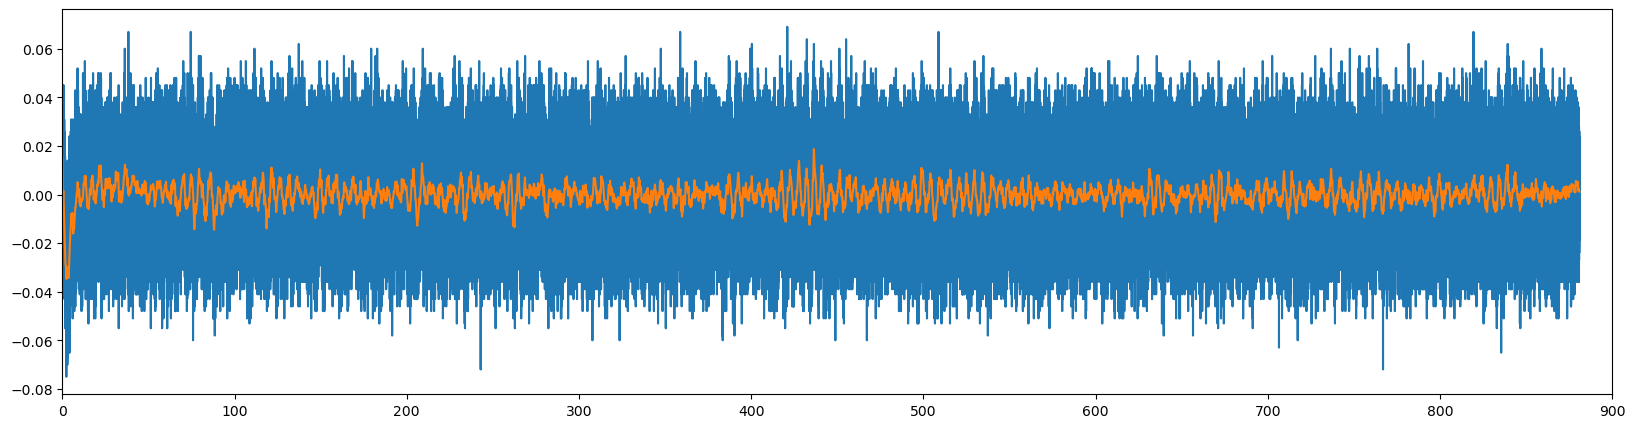

In [39]:
dic = rw.csv2dict(data)

fig,ax = plt.subplots(figsize=(20,5))

phone = 21
coords = ['x','y','z']
T = np.asarray(dic['ta']).astype(float)/10**6
for c in coords:
    dic['a'+c] = np.asarray(dic['a'+c]).astype(float)
dic['ta']=T
print(phone,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))

t = dic['ta']-dic['ta'][0]
y = dic['az']
y = y-np.mean(y)
y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.01,flow=0.00005)

plt.plot(t,y)
plt.plot(t,y_wave)
plt.xlim(0,900)

In [25]:
base = '/media/turbots/BlueDisk/Shack25_local/'

date = '0203'
phone = 21

folder = base +f'Data/{date}/Phone/{phone}/'
filelist = glob.glob(folder+'accelerometer*')

m={}
datas = []
coords = ['x','y','z']
print(phone)
for i,filename in enumerate(filelist):
    data = rw_data.read_csv(filename)
    dic = rw_data.csv2dict(data)

    Tsync = np.asarray(dic['ta']).astype(float)/10**6
    for c in coords:
        dic['a'+c] = np.asarray(dic['a'+c]).astype(float)
    dic['ta']=Tsync
    datas.append(dic)
    print(i,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))

m[phone]=datas

21
0 -9.739978754221852 1.5859244102692547 0.8238315043205189 1.1482797847190476
1 -6.296558048843816 1.3056261141898542 1.0425320419238346 7.6423533509750134
2 9.805712567970835 0.014826869826586231 0.015452095519775243 0.01558529753133427
3 9.801961441148611 0.013543516062503546 0.014745179364217395 0.014765296115934015
4 9.800172915965277 0.013397401954427337 0.014577704585593649 0.014670431217854281
5 9.799312060272221 0.013344988996861873 0.014505799596604859 0.014647279369613957
6 9.798853929718055 0.013297570173758126 0.01456726598553946 0.014584402359782388
7 9.798204358276386 0.013267640798847919 0.014528249087347497 0.014537078716273522
8 9.797926578416664 0.01329169309109514 0.014574657878702732 0.014506022423545484
9 9.797675997065278 0.013240203756538987 0.01447575400843413 0.014443008490969378
10 9.797814074834722 0.01322284241935437 0.014421725538352389 0.01443467793825798
11 9.798004596981944 0.013227475125825052 0.014420336504041054 0.014469953995120858
12 9.7982351884

In [238]:
(46164333993 - 45264457287) / 1e6

899.876706

In [240]:
line = [62_0,62,0,1738374191.7004647,0.0016140165,1738374191.7001886,1738374191.7006545,0.00010423412695245264,50,1738419222.6897173]


In [8]:
filename = '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/Tsync/tsync_1738419342'

synctable = rw.read_csv(filename,delimiter=',')
synctable = rw.csv2dict(synctable)

timetable = {}
phonelist = []
t0 = synctable['0_0']['t0']
for key in synctable:
    phone,i = key.split('_')
    phone = int(phone)
    if not phone in phonelist:
        phonelist.append(phone)
        timetable[phone]=[]
    timetable[phone].append(synctable[key]['tlag'])

for phone in phonelist:
    timetable[phone] = np.mean(timetable[phone])
pprint(timetable)


['phone', 'iter', 'tlag', 'dtmedian', 'tmin', 'tmax', 'tstd', 'n', 't0']
['0_0', '0', '0', '1738418902.17872', '0.0017045665000000002', '1738418902.178598', '1738418902.1789145', '8.235415340473988e-05', '50', '1738419211.7666726']
['2_0', '2', '0', '1737121520.0597029', '0.0019856120000000003', '1737121520.059486', '1737121520.0603476', '0.0002442747616601099', '49', '1738419215.6008306']
['3_0', '3', '0', '1737224618.0504465', '0.0015850695', '1737224618.0502918', '1737224618.05061', '8.657121420764143e-05', '50', '1738419216.0741687']
['4_0', '4', '0', '1738326732.6696436', '0.0013847445', '1738326732.6695323', '1738326732.6697898', '6.391023367422995e-05', '50', '1738419216.3749998']
['5_0', '5', '0', '1737224626.3721771', '0.001748416', '1737224626.371911', '1737224626.3723445', '0.00010209110283137354', '50', '1738419216.8343472']
['6_0', '6', '0', '1738325426.5916772', '0.0024526540000000003', '1738325426.5914388', '1738325426.5918677', '0.00011886205646892161', '50', '173841921

In [37]:
base = '/home/turbots/Documents/Bicwin2025'

date = '0201'
phonelist = [58,59,62]

m={}
for phone in phonelist:
    folder = base +f'/Data/{date}/Phone/{phone}/'

    filelist = glob.glob(folder+'accelerometer*')

    datas = []
    coords = ['x','y','z']
    print(phone)
    for i,filename in enumerate(filelist):
        data = rw_data.read_csv(filename)
        dic = rw_data.csv2dict(data)

        Tsync = np.asarray(dic['ta']).astype(float)/10**6+timetable[phone]
        for c in coords:
            dic['a'+c] = np.asarray(dic['a'+c]).astype(float)
        dic['ta']=Tsync
        datas.append(dic)
        print(i,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))

    m[phone]=datas

58
0 10.063960387447407 0.530202014467021 0.5681384908236368 0.6505255424201313
1 10.059912209967749 0.5059350894891376 0.4684573913752614 0.7343026593421924
2 10.055798189612768 0.5959808534517915 0.674530496303014 0.9865336962474915
3 10.069785738170554 0.027867157024921596 0.031222801883774326 0.047021598315528955
4 10.038900483351114 0.02675521221039196 0.0264194512943902 0.04564835095937934
5 10.0295872151375 0.010532648518201883 0.028323020496084556 0.038595120864343684
6 8.022010042423162 1.6964267042694803 1.3615335882167026 5.572657196245988
7 9.975412584075002 0.008124667453223586 0.023263685386302253 0.024382439676122893
8 9.974803898887497 0.007848930536925773 0.023158926177292878 0.024379097192035497
9 9.975808902766666 0.007824082000997398 0.02311969598130629 0.024122542665417693
10 9.978191296359723 0.0078334199625825 0.023297048074617625 0.024082138543997
11 9.980082592910552 0.007949710111002343 0.022816097569316365 0.0258798629398286
12 9.981387557430555 0.00786673438

23 9.860315361154166 0.007177817557347706 0.0072589027681530735 0.023020729548349366
24 9.850123633030556 0.007244856999058836 0.00729501129414547 0.023497059613032504
25 9.84904962100833 0.007212476694686322 0.007342188401166861 0.023176346420547122
26 9.850457485061114 0.00726364184972786 0.008030164008316862 0.023102954044736824
27 9.850529715448612 0.007247891030015424 0.0074017401824706406 0.02310762263272566
28 9.850614797343054 0.007193886594366003 0.00735750287338182 0.02316349771563618
29 9.850947812538891 0.007225591029624856 0.0073658628489180105 0.02323792520999753


In [11]:
m.keys()

dict_keys([58, 59, 62])

In [45]:
54000/3600

15.0

In [ ]:
import icewave.field.time as timest
import icewave.phone.analyse as analyse

phone = 59
datas = m[phone]
fig,axs = plt.subplots(figsize=(20,15),nrows=3,sharex=True)

for i in range(len(datas)):
    print(i)
    dic = datas[i]
    ta = (np.asarray(dic['ta']).astype(float))#time in second, UTC time
    ta = ta-ta[0]+timest.today_time([ta[0]])[0]

    for i,c in enumerate(coords):
        y = dic['a'+c]
        y = y-np.mean(y)
        axs[i].plot(ta,y)
        y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.002,flow=0.0001)
        axs[i].plot(ta,y_wave*10,'k')
    
    print(timest.display_time([ta[0]]))
figs = graphes.legende('','$a_x$','',ax=axs[0])
figs = graphes.legende('','$a_y$','',ax=axs[1])
figs = graphes.legende('$t$ (s)','$a_z$','',ax=axs[2])
fig.subplots_adjust(hspace=0)

import icewave.field.multi_instruments as multi

#tmin = multi.convert_time('20:08:00')
#tmax = multi.convert_time('20:13:00')
plt.xlim([tmin,tmax])

ticks = np.linspace(tmin,tmax,6)
axs[2].set_xticks(ticks,display_time(ticks))


0
['09:17:34']
1
['09:32:48']
2
['09:48:02']
3
['10:03:17']
4
['10:18:32']
5
['10:33:48']
6
['10:49:05']
7
['11:04:21']
8
['11:19:39']
9
['11:34:57']
10
['11:50:16']
11
['12:05:33']
12
['12:20:50']
13
['12:36:07']
14
['12:51:24']
15
['13:06:40']
16
['13:21:57']
17
['13:37:14']
18
['13:52:30']
19
['14:07:46']
20
['14:23:03']
21
['14:38:19']
22
['14:53:36']
23
['15:08:53']
24
['15:24:09']
25
['15:39:26']
26
['15:54:43']
27
['16:10:01']
28
['16:25:18']
29
['16:40:37']
30
['16:55:55']
31
['17:11:14']
32
['17:26:33']
33
['17:41:52']
34
['17:57:10']
35
['18:12:29']
36
['18:27:48']
37
['18:43:07']
38
['18:58:26']
39
['19:13:45']


NameError: name 'tmin' is not defined

55.12491281617355

In [241]:
(line[3]-line[-1])

-45030.98925256729

In [223]:
45264457287 / 1e6 / 60 / 24

31.43365089375

In [218]:
46164333993 / 1e6

46164.333993

In [184]:
ts_20230629T064613 = 1688021173

In [187]:
1738532096 - ts_20230629T064613

50510923

In [207]:
ts_20230629T064613 + 53_365_417_168 / 1e6

1688074538.417168

In [204]:
np.ediff1d(np.array(_t[1:], dtype=float)[:, 0])

array([2514., 2514., 2514., ..., 2514., 2513., 2514.])

In [239]:
!ls /home/turbots/Documents/Bicwin2025/Data/0201/Phone

5  58  59  60  61  62  Results	Tsync


In [40]:
#!ls /home/turbots/Documents/Bicwin2025/Data/0201/Phone/62

In [41]:
#!cat /home/turbots/Documents/Bicwin2025/Data/0201/Phone/Tsync/tsync_1738418744

In [79]:
m={}

In [160]:
filelist[0]

'/home/turbots/Documents/Bicwin2025/Data/0201/Phone/62/accelerometer-1-45264457287-46164333993.pkl'

In [165]:
46164333993/10**6

46164.333993

In [162]:
dic['ta'][0]

76408332309.0

In [14]:
dic = rw_data.csv2dict(data)

In [157]:
np.mean(np.diff(dic['ta'][:10]))/1000

2.5525555555555557

76408332.309

In [159]:
dic['ta'][0]/1000/3600/24/365/

SyntaxError: invalid syntax (2517116250.py, line 1)

In [27]:
ta = timest.today_time(dic['ta'])
print(ta[:10])
print(len(ta))

[52131.6138, 54683.6138, 57235.6138, 59788.6138, 62340.6138, 64892.6138, 67445.6138, 69998.6138, 72552.6138, 75104.6138]
360000


In [36]:
dic['ta']/10**6

array([68048.79747461, 68048.80002161, 68048.80256861, ...,
       68965.48664961, 68965.48919561, 68965.49174161])

In [31]:
ta = (np.asarray(dic['ta']).astype(float))
ta = ta-ta[0]+timest.today_time([ta[0]])[0]


In [33]:
print(type(ta[0]))

<class 'numpy.float64'>


22
23


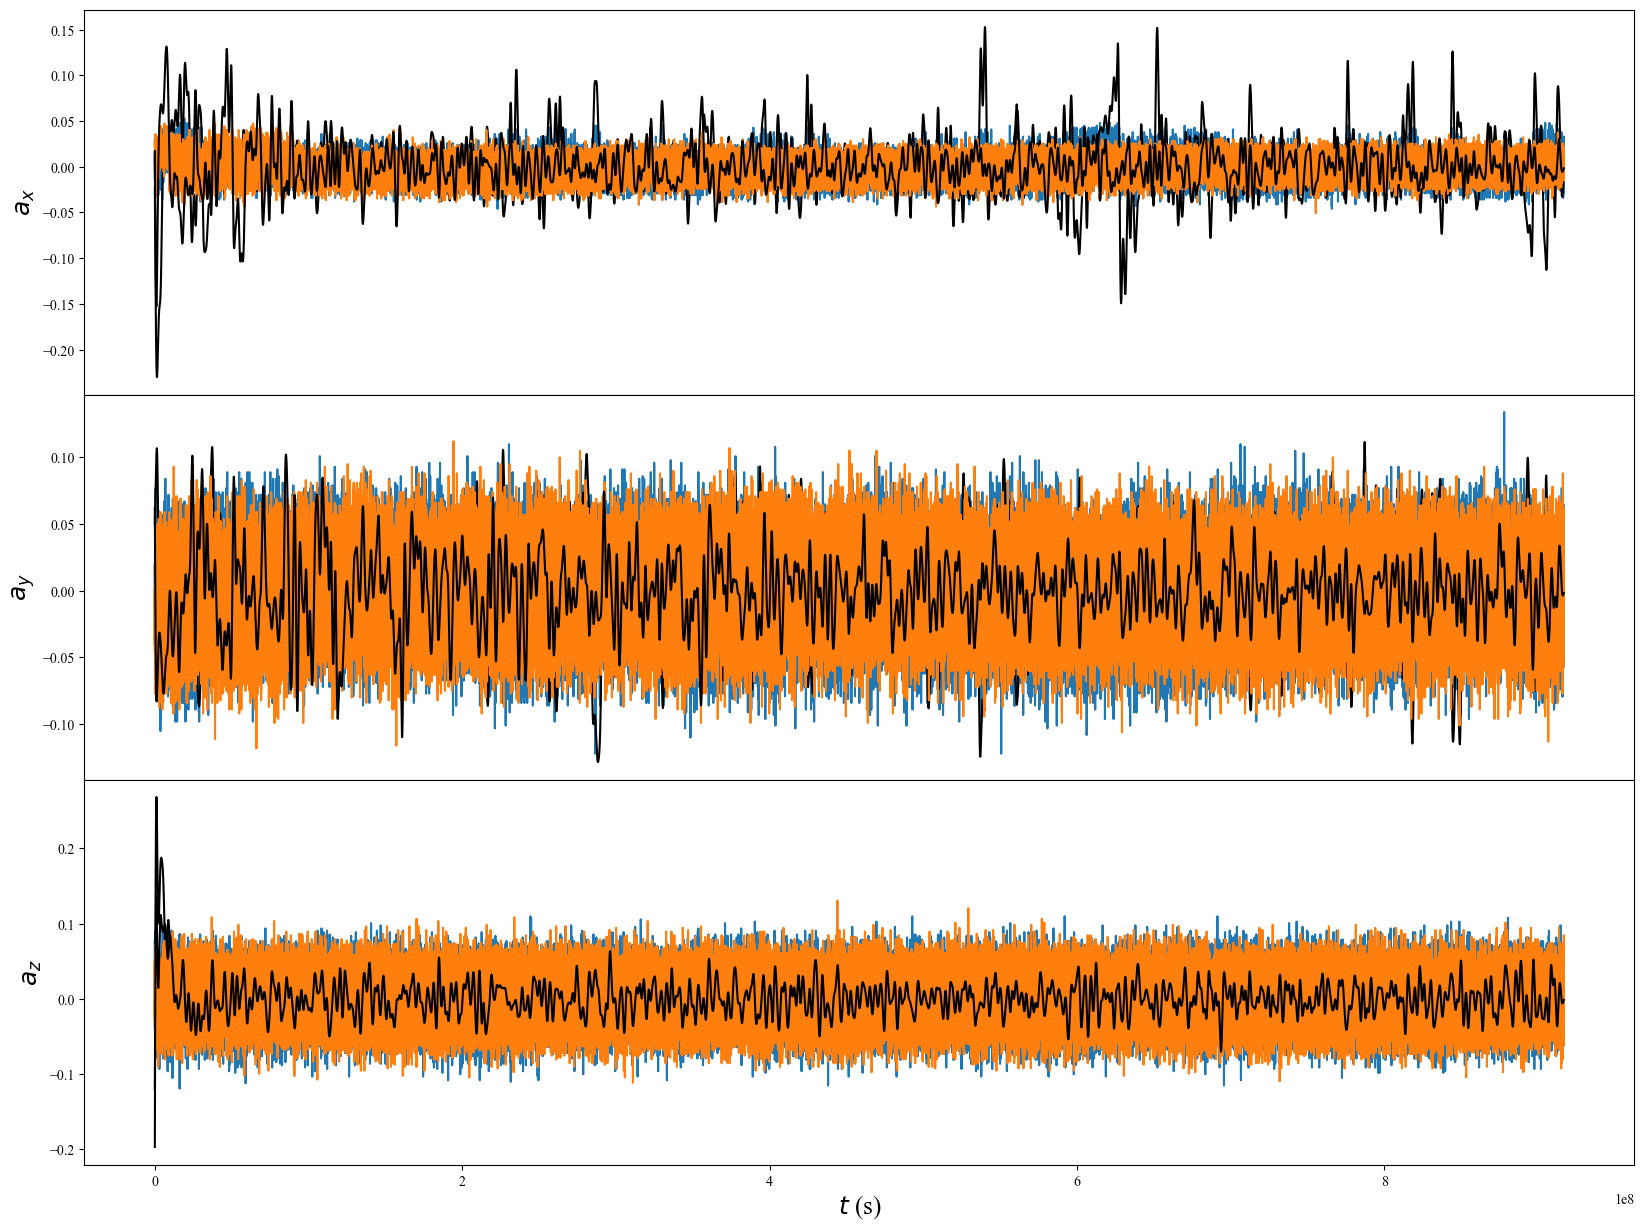

In [132]:
#19h12 UTC
#
line = [58_0,58,0,1738413622.0215788,0.0019006895,1738413622.021405,1738413622.0217085,8.651058798935326e-05,50,1738419220.7759938]

In [138]:
line1 = [0_0,0,0,1738418902.17872,0.0017045665000000002,1738418902.178598,1738418902.1789145,8.235415340473988e-05,50,1738419211.7666726]
print(line1)
line1[3]-line1[-1]

[0, 0, 0, 1738418902.17872, 0.0017045665000000002, 1738418902.178598, 1738418902.1789145, 8.235415340473988e-05, 50, 1738419211.7666726]


-309.58795261383057

In [140]:
Dt = line[-1]-line[3]
print(Dt)

5598.754415035248


In [135]:
import icewave.field.time as timest

t0 = [1738413622.0207553]
timest.display_time(timest.today_time(t0))

line[3]-line[-1]

['07:40:22']

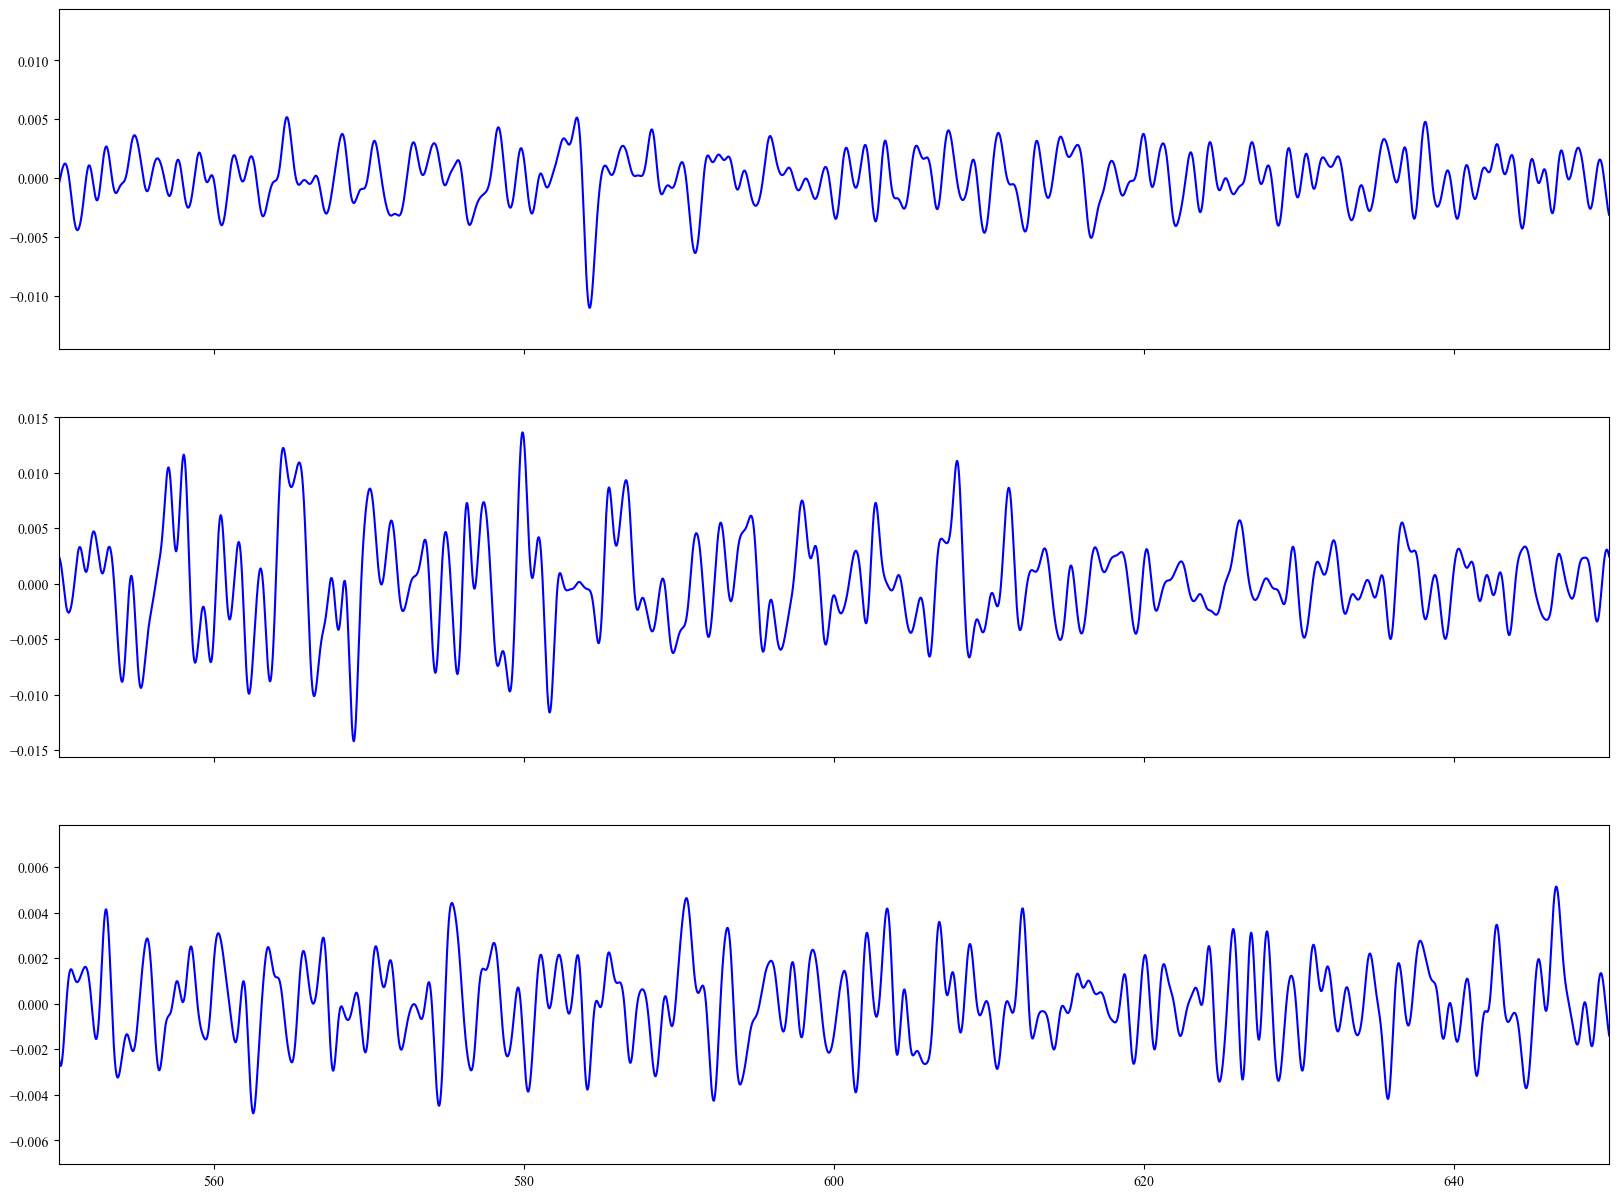

In [123]:
phonelist = [58,59,62]

fig,axs = plt.subplots(figsize=(20,15),nrows=3,sharex=True)


for i,phone in enumerate(phonelist):
    datas = m[phone]
    dic = datas[25]
    ta = np.asarray(dic['ta']).astype(float)
    az = np.asarray(dic['az']).astype(float)
    ax = np.asarray(dic['ax']).astype(float)
    ay = np.asarray(dic['ay']).astype(float)

    t = (ta-ta[0])/10**6
    #plt.plot(t,ax-np.mean(ax),'k-')

    import icewave.phone.analyse as analyse

    y_high,y_wave,y_trend,err = analyse.filtering(ax,fc=0.005,flow=0.0005)

    g=9.81
    axs[i].plot(t,y_wave,'b-')
    #plt.plot(t,y_high,'b-')

    plt.xlim(550,650)

In [124]:
np.std(ax)

0.007212476694686322

In [57]:
analyse.time_spectrum(ta,ax,nt=300)

Number of samples : 1200


(array([0.00000000e+00, 1.43838747e-07, 2.87677494e-07, ...,
        1.93750792e-04, 1.93894631e-04, 1.94038469e-04]),
 array([5.420107  , 5.40387426, 5.33796757, ..., 0.15912128, 0.15571553,
        0.15249032]),
 1.4383874682959443e-06,
 3.449465300488065)

In [36]:

base = '/home/turbots/Documents/Bicwin2025'

date = '0201'
phone = 59
folder = base +f'/Data/{date}/Phone/{phone}/'

filelist = glob.glob(folder+'accelerometer*')
pprint(filelist)

['/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-1-45231831847-46145821871.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-2-46145824409-47059871610.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-3-47059874148-47974560534.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-4-47974563076-48889817696.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-5-48889820239-49805857199.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-6-49805859744-50722506798.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-7-50722509344-51639347871.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-8-51639350418-52556705851.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-9-52556708400-53475309898.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-10-534753124